<a href="https://www.creditas.com/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Creditas_Logo_Principal.png/1200px-Creditas_Logo_Principal.png" style="width:200px; float: center;"></a>

<a id='Inicio'> </a>

<h1 align='center'> Desafio Data Science - Creditas</h1>
<br>
<center> 
Lucas Igor Balthazar<br>
Cientista de Dados, Físico <br>
<a href = "mailto: lucasibalthazar@gmail.com">lucasibalthazar@gmail.com</a></center>

Este notebook é um estudo de caso para a empresa [Creditas](https://www.creditas.com/)

<b>Objetivos:</b>

> O objetivo é construir um modelo de classificação que retorne a probabilidade que um cliente tem de ser enviado para análise de crédito dado que ele foi pré-aprovado para o empréstimo com garantia de automóvel. Contudo, apenas a construção do modelo não basta, já que é necessário que você realize a apresentação do mesmo para a equipe de Operações da Creditas e o time de Marketing e Analytics. Eles querem entender porque o seu modelo é melhor do que a decisão atual de priorização e para tal, é necessário que você realize a avaliação do modelo com métricas de classificação e avaliação dos atributos mais importantes para o modelo.

<a id='Inicio'> </a>

### Índice

- [1.1 Imports e Setup](#Imports_Setup)


- [1.2  Exploratory Data Analysis - EDA](#EDA)


- [1.3  Checado os casos de NaN na base de dados](#NAN)


- [1.4  Filtrando a base de dados para apenas clientes pré aprovados](#APROVADOS)


- [1.5  Análise Exploratória - Gráficos](#HISTO)


- [1.6  Preparação para Modelagem](#MOD_PREP)


- [1.7  Treinamento dos Modelos e Métricas](#MODELOS)


- [1.8  Gerar Ranking de Clientes por Probabilidade](#RANK)

<a id='Imports_Setup'></a>

## Imports & Setup

Este notebook tem as seguintes dependências da biblioteca Python:

In [2]:
import os                                           #all built-in operating system dependent modules
import sys                                          #provides access to some variables used or maintained by the interpreter
import pylab
import pandas as pd                                 #data processing csv, excel, files
import numpy as np                                  #scientific computing
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns                               #data visualization library based on matplotlib
import matplotlib.pyplot as plt                     #graphical plots analysis
%matplotlib inline

In [3]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [4]:
from IPython.display import HTML
%matplotlib inline

###  Funções auxiliares úteis
Algumas funções auxiliares úteis para suportar a manipulação de dados

In [5]:
def print_dtypes(df: pd.DataFrame)-> pd.DataFrame:
    '''Printing columns dtypes from database. 
    args.: df = pandas DataFrame'''
    
    return df.dtypes

def cardinality_check(df: pd.DataFrame)-> pd.DataFrame:
    '''Checking cardinality / distinct count for all columns dataframe. 
    args.: df = pandas DataFrame'''
    
    return df.apply(pd.Series.nunique)

def checking_NaN(df: pd.DataFrame)-> pd.DataFrame:
    '''Checking empty values'''
    empt = df.isnull().values.any()
    if empt:
        val = df.isnull().sum()
    else:
        val = 0
    return print(f'Dados faltantes: {empt}\nValores:\n{val}')

def proportion_missing(df):
    '''Missing data proportion (%)'''
    perc ={}
    for item in df.columns:
        if df[item].isnull().values.any():
            perc[item] = round((df[item].isnull().sum()/df.shape[0])*100,3)
    return perc

def categoric_array(df: pd.DataFrame)-> pd.DataFrame:
    '''Getting the non-numeric (categorical) values in df's'''
    array_not_num = [item for item in df.columns if df[item].dtypes == 'object']
    return array_not_num

def numeric_array(df: pd.DataFrame)-> pd.DataFrame:
    '''Getting the numeric (numeric) values in df's'''
    array_num = [item for item in df.columns if df[item].dtypes != 'object']
    return array_num

def verify_category_uniform(df):
    '''To analyse the uniform type in the categorical variables'''
    array_not_num = [item for item in df.columns if df[item].dtypes == 'object']
    cat_type = {}
    for item in array_not_num: cat_type[item] = df[item].unique()
    return cat_type

def plot_dataframe_structure(df: pd.DataFrame, df_name)-> pd.DataFrame:
    '''To plot DataFrame Structure Proportions
    args.: df = pandas DataFrame'''
    plt.figure()
    df.dtypes.value_counts().plot.pie(ylabel='')
    plt.title('Data types '+str(df_name))
    plt.show()

def summary_data(df):
    print('#'*30+' SHAPE '+'#'*30)
    print(df.shape)
    print('#'*30+' HEAD '+'#'*30)
    print(df.head(3))
    print('#'*30+' TAIL '+'#'*30)
    print(df.tail(3))
    print('#'*30+' DTYPES '+'#'*30)
    print(df.dtypes)
    print('#'*30+' DESCRIBE '+'#'*30)
    print(df.describe())
    print('#'*30+' INFO '+'#'*30)
    print(df.info(3))
    print('#'*30+' QUANTILES '+'#'*30)
    print(df.quantile([0.25,0.5,0.75]))

<a id='EDA'></a>

<br>
<center>
    
## Exploratory Data Analysis - EDA

Exploratory Data Analysis  ou Data Wrangling é o processo de transformar e mapear dados de uma forma de dados "brutos" em outro formato com a intenção de torná-los mais apropriados e valiosos para uma variedade de finalidades posteriores.

### Importando dados a partir do caminho do arquivo:

In [6]:
### Caminho do arquivo:
#File Path
def filepath(file_name:'csv') -> 'str':
    '''Add the file path'''
    if not (file_name.find('.csv') != -1): file_name = file_name+'.csv'
    script_dir = os.getcwd()
    rel_path = file_name       #File name
    abs_file_path = os.path.join(script_dir, rel_path)
    
    return abs_file_path

In [7]:
filepath('dataset')

'C:\\Users\\lucas\\Documents\\Creditas Case\\desafio-ds\\desafio-ds\\dataset.csv'

In [8]:
filepath('description')

'C:\\Users\\lucas\\Documents\\Creditas Case\\desafio-ds\\desafio-ds\\description.csv'

### Criação do DataFrame que será utilizado na análise

Vamos importar os dados do arquivo `dataset.csv` para um DataFrame com auxilio do Pandas:

In [9]:
#Conjunto de Dados Brutos
df = pd.read_csv(filepath('dataset'))
df.head(3).T

,0,1,2
id,100001025857,173466,173465
age,61.0,50.0,31.0
monthly_income,1300.0,3500.0,2600.0
collateral_value,NaN,40000.0,18000.0
loan_amount,10000.0,23936.0,5000.0
city,NaN,Muriaé,Araxá
state,NaN,MG,MG
collateral_debt,NaN,NaN,10000.0
verified_restriction,NaN,1.0,0.0
dishonored_checks,0,0,0


O conteúdo do `description.csv` para entender a documentação

In [10]:
#Descrição dos Dados
df_description = pd.read_csv(filepath('description'))
df_description.head(3)

,id,Chave única de uma solicitação de cliente
0,age,Idade do cliente
1,monthly_income,Renda mensal informada pelo cliente no momento...
2,collateral_value,Valor do automóvel que será dado em garantia


Aqui iremos fazer uma breve visualização dos dados para compreendermos aspectos gerais por meio da definição `def summary_data`:

In [11]:
summary_data(df)

############################## SHAPE ##############################
(35021, 32)
############################## HEAD ##############################
             id   age  monthly_income  collateral_value  loan_amount    city  \
0  100001025857  61.0          1300.0               NaN      10000.0     NaN   
1        173466  50.0          3500.0           40000.0      23936.0  Muriaé   
2        173465  31.0          2600.0           18000.0       5000.0   Araxá   

  state  collateral_debt  verified_restriction  dishonored_checks  ...  \
0   NaN              NaN                   NaN                  0  ...   
1    MG              NaN                   1.0                  0  ...   
2    MG          10000.0                   0.0                  0  ...   

   pre_approved  form_completed  sent_to_analysis  channel  zip_code  \
0           0.0             1.0               0.0      NaN  5754XXXX   
1           0.0             0.0               0.0   search  3688XXXX   
2           0.0    

>- O `dataset.csv` possui <b>35.021</b> registros e <b>32</b> colunas

Vamos checar mais profundamente a usando as funções `.info()` e a cardinalidade dos atributos através da função auxiliar `def cardinality_check()`

In [12]:
#Checando mais profundamente os tipos das variáveis e cardinalidade dos dados
print("\nInformações sobre as colunas:")
df.info()
print('-'*40)
cardinality_check(df)


Informações sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35021 entries, 0 to 35020
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35021 non-null  int64  
 1   age                   35019 non-null  float64
 2   monthly_income        35019 non-null  float64
 3   collateral_value      35000 non-null  float64
 4   loan_amount           35018 non-null  float64
 5   city                  34998 non-null  object 
 6   state                 35017 non-null  object 
 7   collateral_debt       24650 non-null  float64
 8   verified_restriction  26329 non-null  float64
 9   dishonored_checks     35021 non-null  int64  
 10  expired_debts         35021 non-null  int64  
 11  banking_debts         35021 non-null  int64  
 12  commercial_debts      35021 non-null  int64  
 13  protests              35021 non-null  int64  
 14  marital_status        415 non-null    o

id                      35017
age                        80
monthly_income           2686
collateral_value         2866
loan_amount              1505
city                     3986
state                      27
collateral_debt          1490
verified_restriction        2
dishonored_checks           2
expired_debts               2
banking_debts               2
commercial_debts            2
protests                    2
marital_status              6
informed_restriction        2
loan_term                   0
monthly_payment          3417
informed_purpose        17668
auto_brand                 73
auto_model               2634
auto_year                  34
pre_approved                2
form_completed              2
sent_to_analysis            2
channel                    10
zip_code                 5709
landing_page              269
landing_page_product        7
gender                      2
utm_term                    3
education_level             9
dtype: int64

In [13]:
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))


Estatísticas descritivas:
                  id           age  monthly_income  collateral_value  \
count   3.502100e+04  35019.000000    3.501900e+04      3.500000e+04   
unique           NaN           NaN             NaN               NaN   
top              NaN           NaN             NaN               NaN   
freq             NaN           NaN             NaN               NaN   
mean    3.000538e+06     38.325338    1.148942e+04      4.679727e+04   
std     5.343669e+08     11.576323    2.614708e+05      8.918176e+05   
min     9.832600e+04     18.000000    0.000000e+00      0.000000e+00   
25%     1.332740e+05     30.000000    2.100000e+03      1.300000e+04   
50%     1.464430e+05     36.000000    3.200000e+03      2.000000e+04   
75%     1.601360e+05     46.000000    5.000000e+03      3.000000e+04   
max     1.000010e+11    116.000000    4.000400e+07      1.000000e+08   

         loan_amount       city  state  collateral_debt  verified_restriction  \
count   3.501800e+04      3

<a id='NAN'></a>

<center>

## Checado os casos de `NaN` na base de dados

### Usando a função auxiliar `def checking NaN`

In [14]:
checking_NaN(df)

Dados faltantes: True
Valores:
id                          0
age                         2
monthly_income              2
collateral_value           21
loan_amount                 3
city                       23
state                       4
collateral_debt         10371
verified_restriction     8692
dishonored_checks           0
expired_debts               0
banking_debts               0
commercial_debts            0
protests                    0
marital_status          34606
informed_restriction     1650
loan_term               35021
monthly_payment          1282
informed_purpose         1117
auto_brand                  9
auto_model                 11
auto_year                   4
pre_approved              173
form_completed            175
sent_to_analysis          173
channel                  1287
zip_code                    0
landing_page             1287
landing_page_product    12092
gender                   3944
utm_term                23814
education_level         15127
dtype: in

In [15]:
#Proporção de valores ausentes em relção a base
proportion_missing(df)
null_prop = pd.DataFrame(proportion_missing(df), index=np.arange(1)).T
null_prop = null_prop.rename(columns={0:'%'})
null_prop

,%
age,0.006
monthly_income,0.006
collateral_value,0.060
loan_amount,0.009
city,0.066
state,0.011
collateral_debt,29.614
verified_restriction,24.819
marital_status,98.815
informed_restriction,4.711


In [16]:
#Variáveis com mais de 30% de valores nulos:
null_prop[null_prop['%'] >30]

,%
marital_status,98.815
loan_term,100.000
landing_page_product,34.528
utm_term,67.999
education_level,43.194


Algumas colunas possuem alta proporção de valores ausentes como:

> -`loan_term`(100%) - completamente vazia;
>
> -`marital_status` (99%) - Quase completamente vazia;
>
> -`utm_term `(68%) - Maior parte vazia, considerar real utilidade;
>
> -`landing_page_product` (34%) Pode ser importante, mas muitos valores ausentes, avaliar tratamento.

Outro detalhe que vale ressaltar é que a importação da base considerou a variável `id` como numérica e sabemos que se trata de uma chave primária para identificaçãos dos registros da base devendo ser considerada como `object`. Logo, vamos transformar o tipo da variável:

In [17]:
df['id'] = df['id'].astype(object)

### Checando um mapa de calor para as posições dos `NaN` no Dataframe

A aplicação do mapa de calor contribui para a verificarmos as posições e saber se a distribuição dos dados faltantes é regular ou concentrada por toda a base de dados.

<AxesSubplot:>

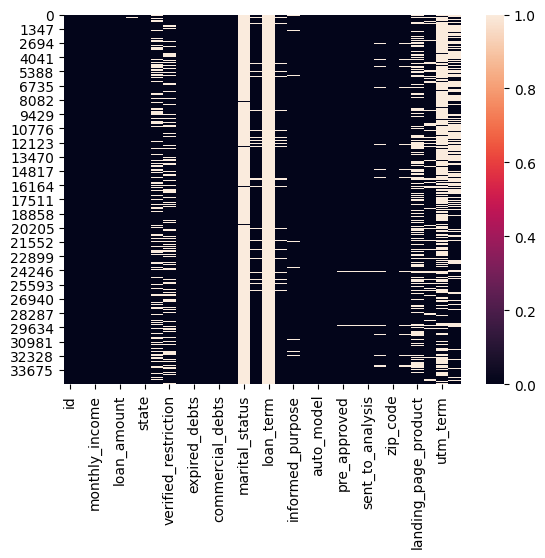

In [18]:
sns.heatmap(df.isna())

<AxesSubplot:>

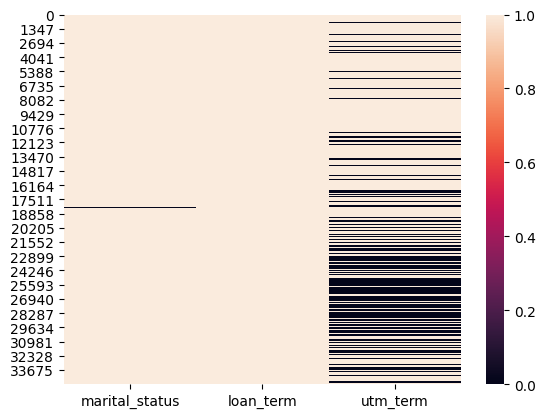

In [19]:
sns.heatmap(df[['marital_status', 'loan_term', 'utm_term']].isna())

Vemos que a distribuição dos valores faltantes `NaN` é feita de maneira uniforme ao longo do dataset para `marital_status` e `loan_term`. Esse valores podem, portanto, ser tratados ou até removidos convenientemente no ETL de dados.

<a id='APROVADOS'></a>

<br>
<center>
    
## Filtrando a base de dados para apenas clientes pré aprovados

In [20]:
# Filtrar apenas clientes pré-aprovados (pre_approved == 1)
df_pre_approved = df[df['pre_approved'] == 1].copy()

In [21]:
# Remover colunas com muitos valores ausentes ou irrelevantes para o modelo
cols_to_drop = ['loan_term', 'marital_status', 'utm_term']
df_pre_approved = df_pre_approved.drop(columns=cols_to_drop)

In [22]:
df_pre_approved.columns

Index(['id', 'age', 'monthly_income', 'collateral_value', 'loan_amount',
       'city', 'state', 'collateral_debt', 'verified_restriction',
       'dishonored_checks', 'expired_debts', 'banking_debts',
       'commercial_debts', 'protests', 'informed_restriction',
       'monthly_payment', 'informed_purpose', 'auto_brand', 'auto_model',
       'auto_year', 'pre_approved', 'form_completed', 'sent_to_analysis',
       'channel', 'zip_code', 'landing_page', 'landing_page_product', 'gender',
       'education_level'],
      dtype='object')

In [23]:
# import sweetviz as sv
# analyze_report = sv.analyze(df_pre_approved)
# analyze_report.show_html('Report.html', open_browser=False)

In [24]:
#Checando os valores filtando apenas os clientes pré-aprovados
print(f'Tamanho do DataFrame apenas de clientes pré-aprovados: {df_pre_approved.shape}')

Tamanho do DataFrame apenas de clientes pré-aprovados: (14999, 29)


In [25]:
# Primeira visualização dos dados
print("Dimensões do dataset:", df_pre_approved.shape)
print("\nPrimeiras linhas:")
print(df_pre_approved.head())
print("\nInformações sobre as colunas:")
print(df_pre_approved.info())

Dimensões do dataset: (14999, 29)

Primeiras linhas:
        id   age  monthly_income  collateral_value  loan_amount  \
7   173460  52.0          5668.0           24000.0       5000.0   
11  173455  20.0          5000.0           14200.0       5000.0   
13  173450  48.0          3000.0           17000.0       8000.0   
18  173442  56.0          7500.0           21000.0      12000.0   
22  173437  35.0          3379.0           16500.0       5000.0   

               city state  collateral_debt  verified_restriction  \
7         São Paulo    SP            900.0                   0.0   
11        Guarulhos    SP           1500.0                   0.0   
13           Manaus    AM           1060.0                   0.0   
18          Maracás    BA              0.0                   1.0   
22  Itaquaquecetuba    SP              0.0                   0.0   

    dishonored_checks  ...  auto_year  pre_approved  form_completed  \
7                   0  ...     2011.0           1.0             

In [26]:
# Verificar a distribuição da variável-alvo
var_resposta = df_pre_approved["sent_to_analysis"].value_counts(normalize=True)
print("Distribuição da variável-alvo (em %):\n", var_resposta * 100)

Distribuição da variável-alvo (em %):
 0.0    78.205214
1.0    21.794786
Name: sent_to_analysis, dtype: float64


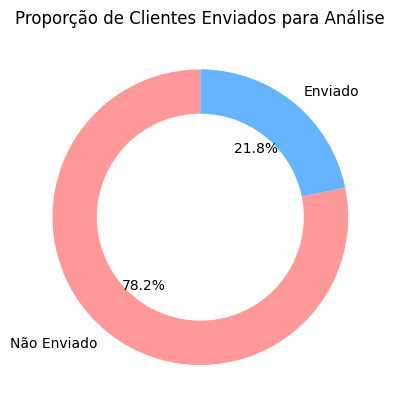

In [27]:
# Contagem dos valores da variável-alvo
labels = ['Não Enviado', 'Enviado']
sizes = df_pre_approved['sent_to_analysis'].value_counts(normalize=True).sort_index() * 100
colors = ['#ff9999','#66b3ff']

# Criar o gráfico de rosca
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops=dict(width=0.4), autopct='%1.1f%%')
# Efeito de rosca
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Proporção de Clientes Enviados para Análise')
plt.show()



>- <b>78,2%</b> (0) dos clientes não foram enviados para análise
>
>- <b>21,8%</b> (1) dos clientes foram enviados para análise

### Separando os dados em Categóricos e Numéricos

Vamos separar as colunas numéricas e as categóricas utilizando as funções criadas em <b>Funções auxiliares úteis<b/> chamadas `def categoric_array`e `def numeric_array`

In [28]:
#Separando as colunas numéricas
num_cols = numeric_array(df_pre_approved)
num_cols

['age',
 'monthly_income',
 'collateral_value',
 'loan_amount',
 'collateral_debt',
 'verified_restriction',
 'dishonored_checks',
 'expired_debts',
 'banking_debts',
 'commercial_debts',
 'protests',
 'informed_restriction',
 'monthly_payment',
 'auto_year',
 'pre_approved',
 'form_completed',
 'sent_to_analysis']

In [29]:
#Separando as colunas categóricas
cat_cols = categoric_array(df_pre_approved)
cat_cols

['id',
 'city',
 'state',
 'informed_purpose',
 'auto_brand',
 'auto_model',
 'channel',
 'zip_code',
 'landing_page',
 'landing_page_product',
 'gender',
 'education_level']

### Usando o comando `describe`

In [30]:
#Alternado o formato de notação científica padrão do Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [31]:
df_pre_approved[num_cols].describe()

,age,monthly_income,collateral_value,loan_amount,collateral_debt,verified_restriction,dishonored_checks,expired_debts,banking_debts,commercial_debts,protests,informed_restriction,monthly_payment,auto_year,pre_approved,form_completed,sent_to_analysis
count,14999.00,14999.00,14986.00,14999.00,9692.00,14935.00,14999.00,14999.00,14999.00,14999.00,14999.00,14193.00,14249.00,14999.00,14999.00,14999.00,14999.00
mean,38.36,11004.53,49109.00,14669.11,4375.59,0.14,0.02,0.00,0.06,0.09,0.02,0.18,850.92,2010.03,1.00,0.28,0.22
std,11.60,153879.50,987560.33,13961.09,103353.10,0.35,0.14,0.05,0.24,0.28,0.12,0.38,18215.17,3.30,0.00,0.45,0.41
min,18.00,0.00,0.00,2500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1986.00,1.00,0.00,0.00
25%,30.00,2500.00,17000.00,6000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,339.94,2008.00,1.00,0.00,0.00
50%,36.00,4000.00,23000.00,10500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,550.70,2010.00,1.00,0.00,0.00
75%,46.00,6000.00,33486.00,18900.00,2000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,838.69,2013.00,1.00,1.00,0.00
max,115.00,11000000.00,99999999.00,719000.00,10100000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2163888.89,2017.00,1.00,1.00,1.00


Vamos ver a representação de gráficos através do `box-plot` das variáveis numéricas para investigarmos a existência de <b>discrepâncias</b> e <b>outliers</b> nos dados apresentados:

(array([1, 2, 3]),
 [Text(1, 0, 'monthly_income'),
  Text(2, 0, 'loan_amount'),
  Text(3, 0, 'collateral_value')])

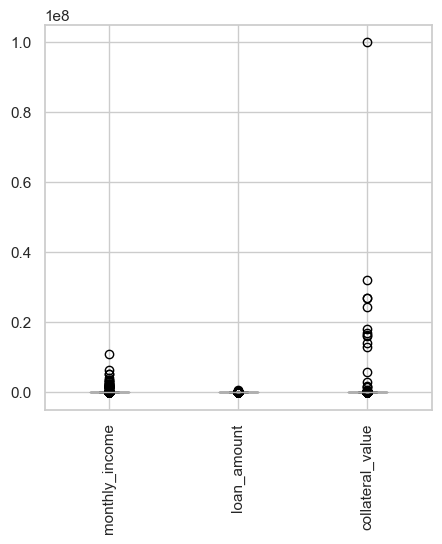

In [120]:
_, bp = pd.DataFrame.boxplot(df_pre_approved[num_cols], return_type='both', figsize=(5,5))

outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
plt.xticks(rotation=90)

Verificamos a existência de valores altos nas variáveis:

> - `monthly_income`
> - `collateral_value`
> - `loan_amount`
> - `collateral_debt`
> - `monthly_payment`

O que indica a necessidade de normalização de dados antes de proseguir com a modelagem

Antes de tratarmos as variáveis faltantes, vamos identificar quais das variáveis podem ser consideradas <b>indicadores</b> ou <b>flags</b>, o que elas representam e qual a melhor estratégia para tratar os `NaN`.

### Tratamento dos valores ausentes das variáveis de indicadores `flags`

In [33]:
possible_flags = []
for col in num_cols:
    unique_vals = df_pre_approved[col].dropna().unique()
    if set(unique_vals).issubset({0, 1}):
        possible_flags.append(col)

print("Colunas identificadas como flags binárias:", possible_flags)

Colunas identificadas como flags binárias: ['verified_restriction', 'dishonored_checks', 'expired_debts', 'banking_debts', 'commercial_debts', 'protests', 'informed_restriction', 'pre_approved', 'form_completed', 'sent_to_analysis']


In [34]:
# Flags a preencher com 0
flags_zero = [
    'dishonored_checks',
    'expired_debts',
    'banking_debts',
    'commercial_debts',
    'protests',
    'informed_restriction'
]
for col in flags_zero:
    if df_pre_approved[col].isnull().sum() > 0:
        df_pre_approved[col].fillna(0, inplace=True)
        print(f"'{col}' preenchido com 0")

# Criar nova flag: se houve consulta automatizada de restrição
df_pre_approved['restriction_checked'] = df_pre_approved['verified_restriction'].notna().astype(int)

'informed_restriction' preenchido com 0


>- Variáveis como `dishonored_checks`, `expired_debts`, `protests` geralmente são derivadas de <i>consultas externas</i> — se estão ausentes, o mais seguro <b>é considerar como 0</b> (sem ocorrência).
>
>
>- `verified_restriction` é especial, pois o `NaN` significa que o sistema não consultou. Isso é uma informação relevante por si só, então o ideal é manter o `NaN` ou criar uma categoria <b>"não verificado".</b>
>
>
>- `informed_restriction` é uma auto declaração. Se estiver `NaN`, significa que o cliente não declarou nada, o que pode ser interpretado como "não tem" ou "omissão".

In [35]:
#Identificando as colunas num´rcias contínuas (exceto flags):
lst = ['sent_to_analysis', 'restriction_checked']
continuous_cols = [col for col in num_cols if col not in possible_flags and col not in lst]

In [36]:
continuous_cols

['age',
 'monthly_income',
 'collateral_value',
 'loan_amount',
 'collateral_debt',
 'monthly_payment',
 'auto_year']

In [37]:
# Imputar contínuas com mediana
for col in continuous_cols:
    if df_pre_approved[col].isnull().sum() > 0:
        mediana = df_pre_approved[col].median()
        df_pre_approved[col].fillna(mediana, inplace=True)
        print(f"Contínua: '{col}' preenchida com mediana: {mediana}")

Contínua: 'collateral_value' preenchida com mediana: 23000.0
Contínua: 'collateral_debt' preenchida com mediana: 0.0
Contínua: 'monthly_payment' preenchida com mediana: 550.7


In [38]:
#Verificando a existência de valores nulos
checking_NaN(df_pre_approved)

Dados faltantes: True
Valores:
id                         0
age                        0
monthly_income             0
collateral_value           0
loan_amount                0
city                       8
state                      0
collateral_debt            0
verified_restriction      64
dishonored_checks          0
expired_debts              0
banking_debts              0
commercial_debts           0
protests                   0
informed_restriction       0
monthly_payment            0
informed_purpose         583
auto_brand                 0
auto_model                 1
auto_year                  0
pre_approved               0
form_completed             0
sent_to_analysis           0
channel                  565
zip_code                   0
landing_page             565
landing_page_product    5705
gender                  1892
education_level         2887
restriction_checked        0
dtype: int64


<a id='HISTO'></a>

## Análise Exploratória - Gráficos

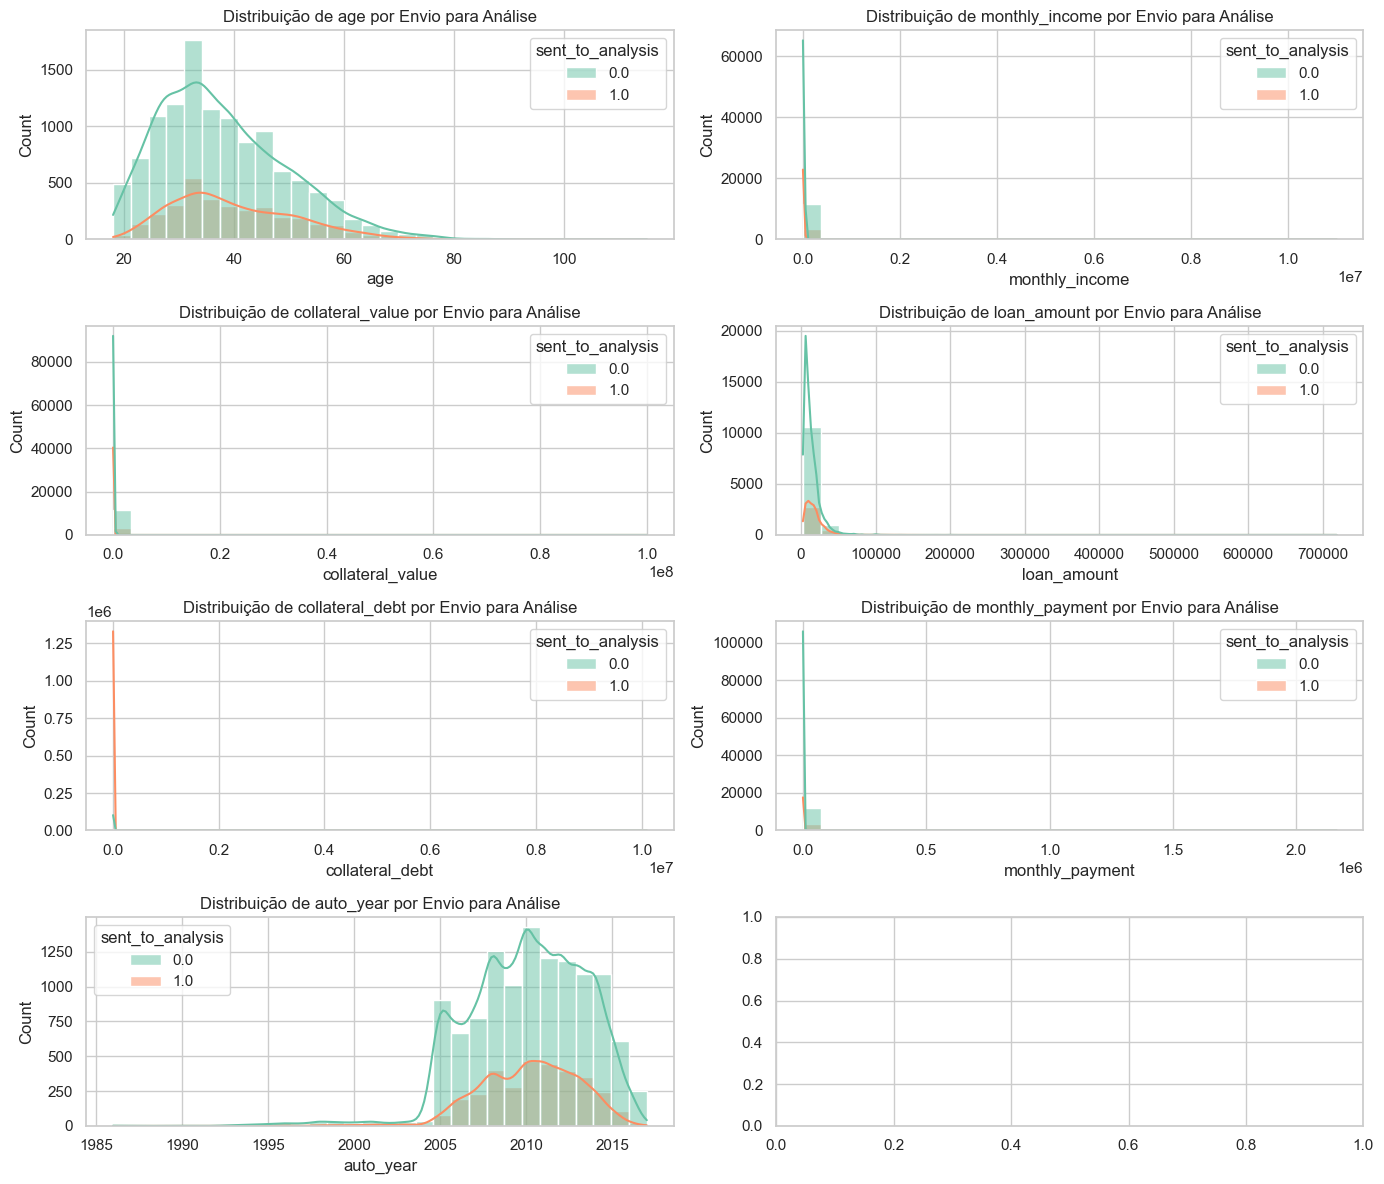

In [39]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.histplot(data=df_pre_approved, x=col, hue="sent_to_analysis", kde=True, bins=30, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribuição de {col} por Envio para Análise")

plt.tight_layout()
plt.show()

Notamos a presença de caudas longas nos histogramas indicando distribuições assimétricas e possíveis outliers, afetando a visualização.

### Plotando novamente os histogramas mas considerando o percentil (.95)

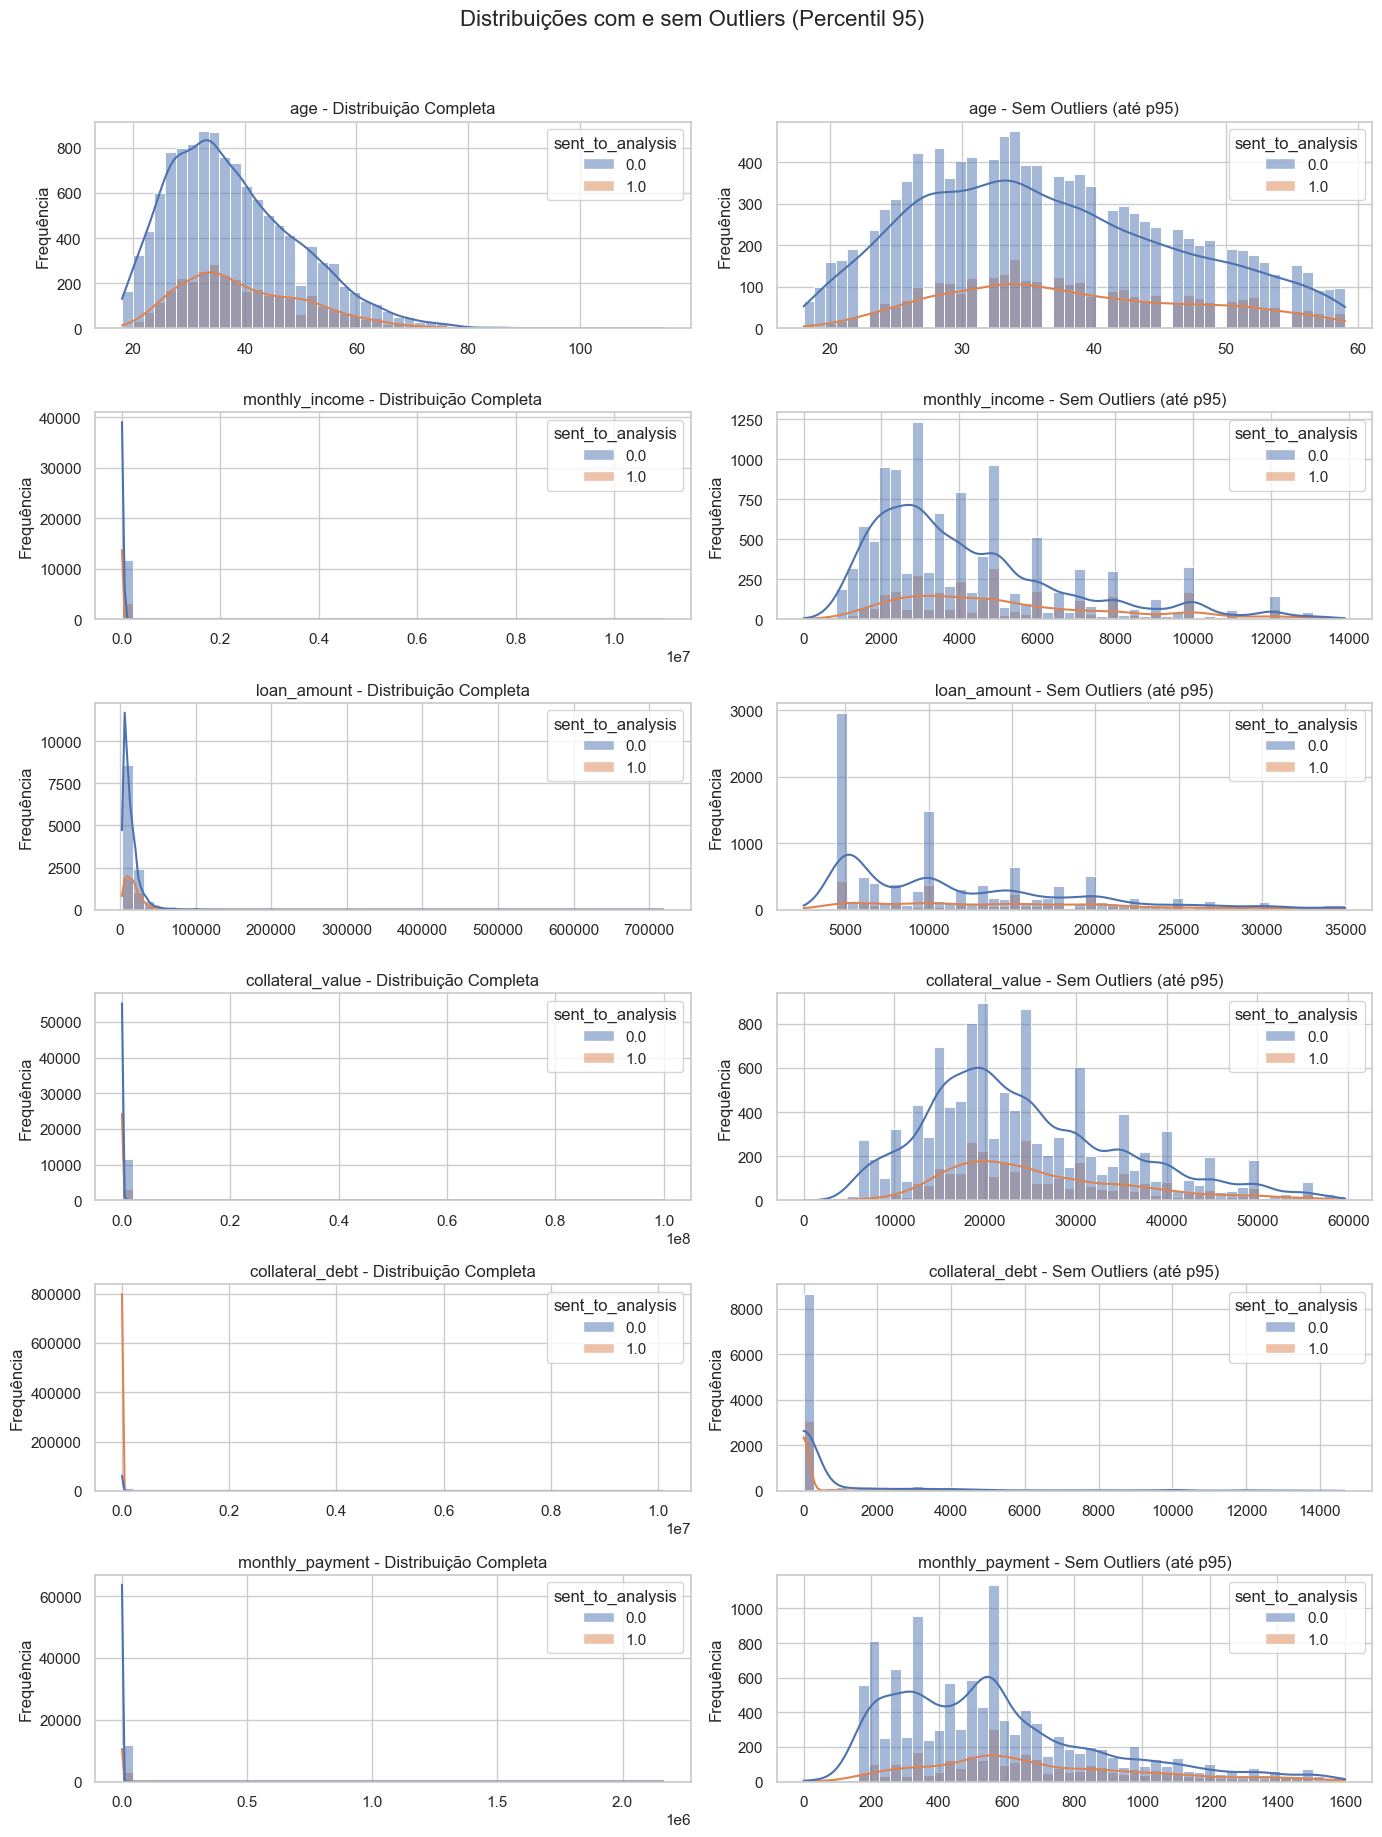

In [65]:
variables = ['age', 'monthly_income', 'loan_amount', 'collateral_value', 'collateral_debt', 'monthly_payment']

fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(14, len(variables)*3))
fig.suptitle("Distribuições com e sem Outliers (Percentil 95)", fontsize=16, y=1.02)

for i, col in enumerate(variables):
    # Histograma completo
    sns.histplot(data=df_pre_approved, x=col, hue="sent_to_analysis", bins=50, kde=True, ax=axes[i, 0], color='steelblue')
    axes[i, 0].set_title(f"{col} - Distribuição Completa")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("Frequência")

    # Histograma sem outliers
    limite = df_pre_approved[col].quantile(0.95)
    df_sem_outliers = df_pre_approved[df_pre_approved[col] < limite]
    sns.histplot(data=df_sem_outliers, x=col, hue="sent_to_analysis", bins=50, kde=True, ax=axes[i, 1], color='seagreen')
    axes[i, 1].set_title(f"{col} - Sem Outliers (até p95)")
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel("Frequência")

plt.tight_layout()

### Boxplots para identificar outliers

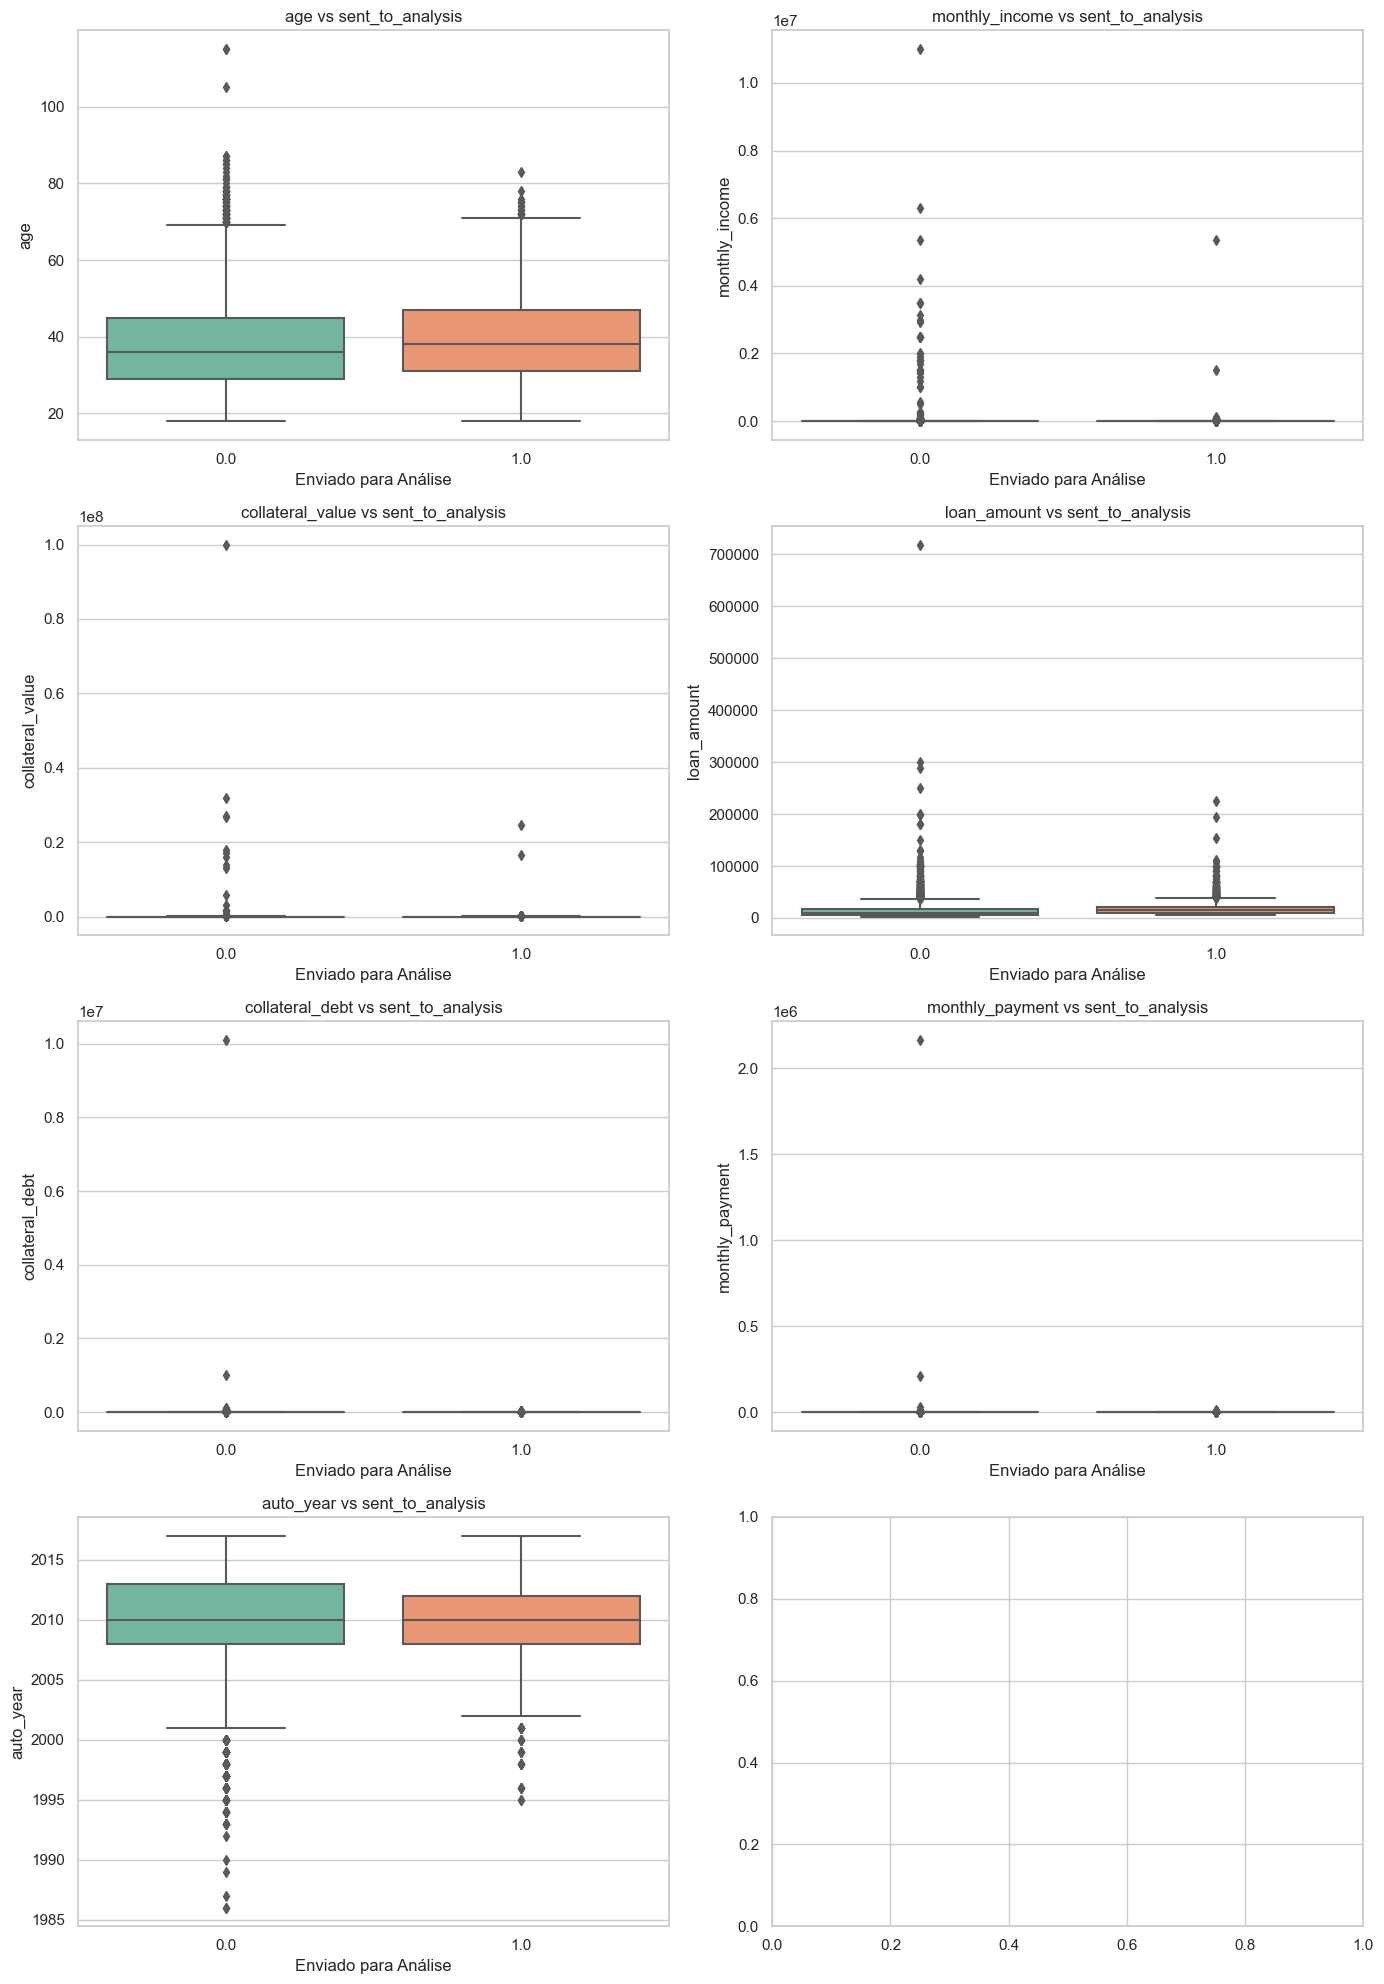

In [42]:
# Gerar boxplots para variáveis numéricas separadas por classe
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df_pre_approved, x="sent_to_analysis", y=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} vs sent_to_analysis")
    axes[i].set_xlabel("Enviado para Análise")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Plotando novamente os `box-plot` mas considerando o percentil (.95)

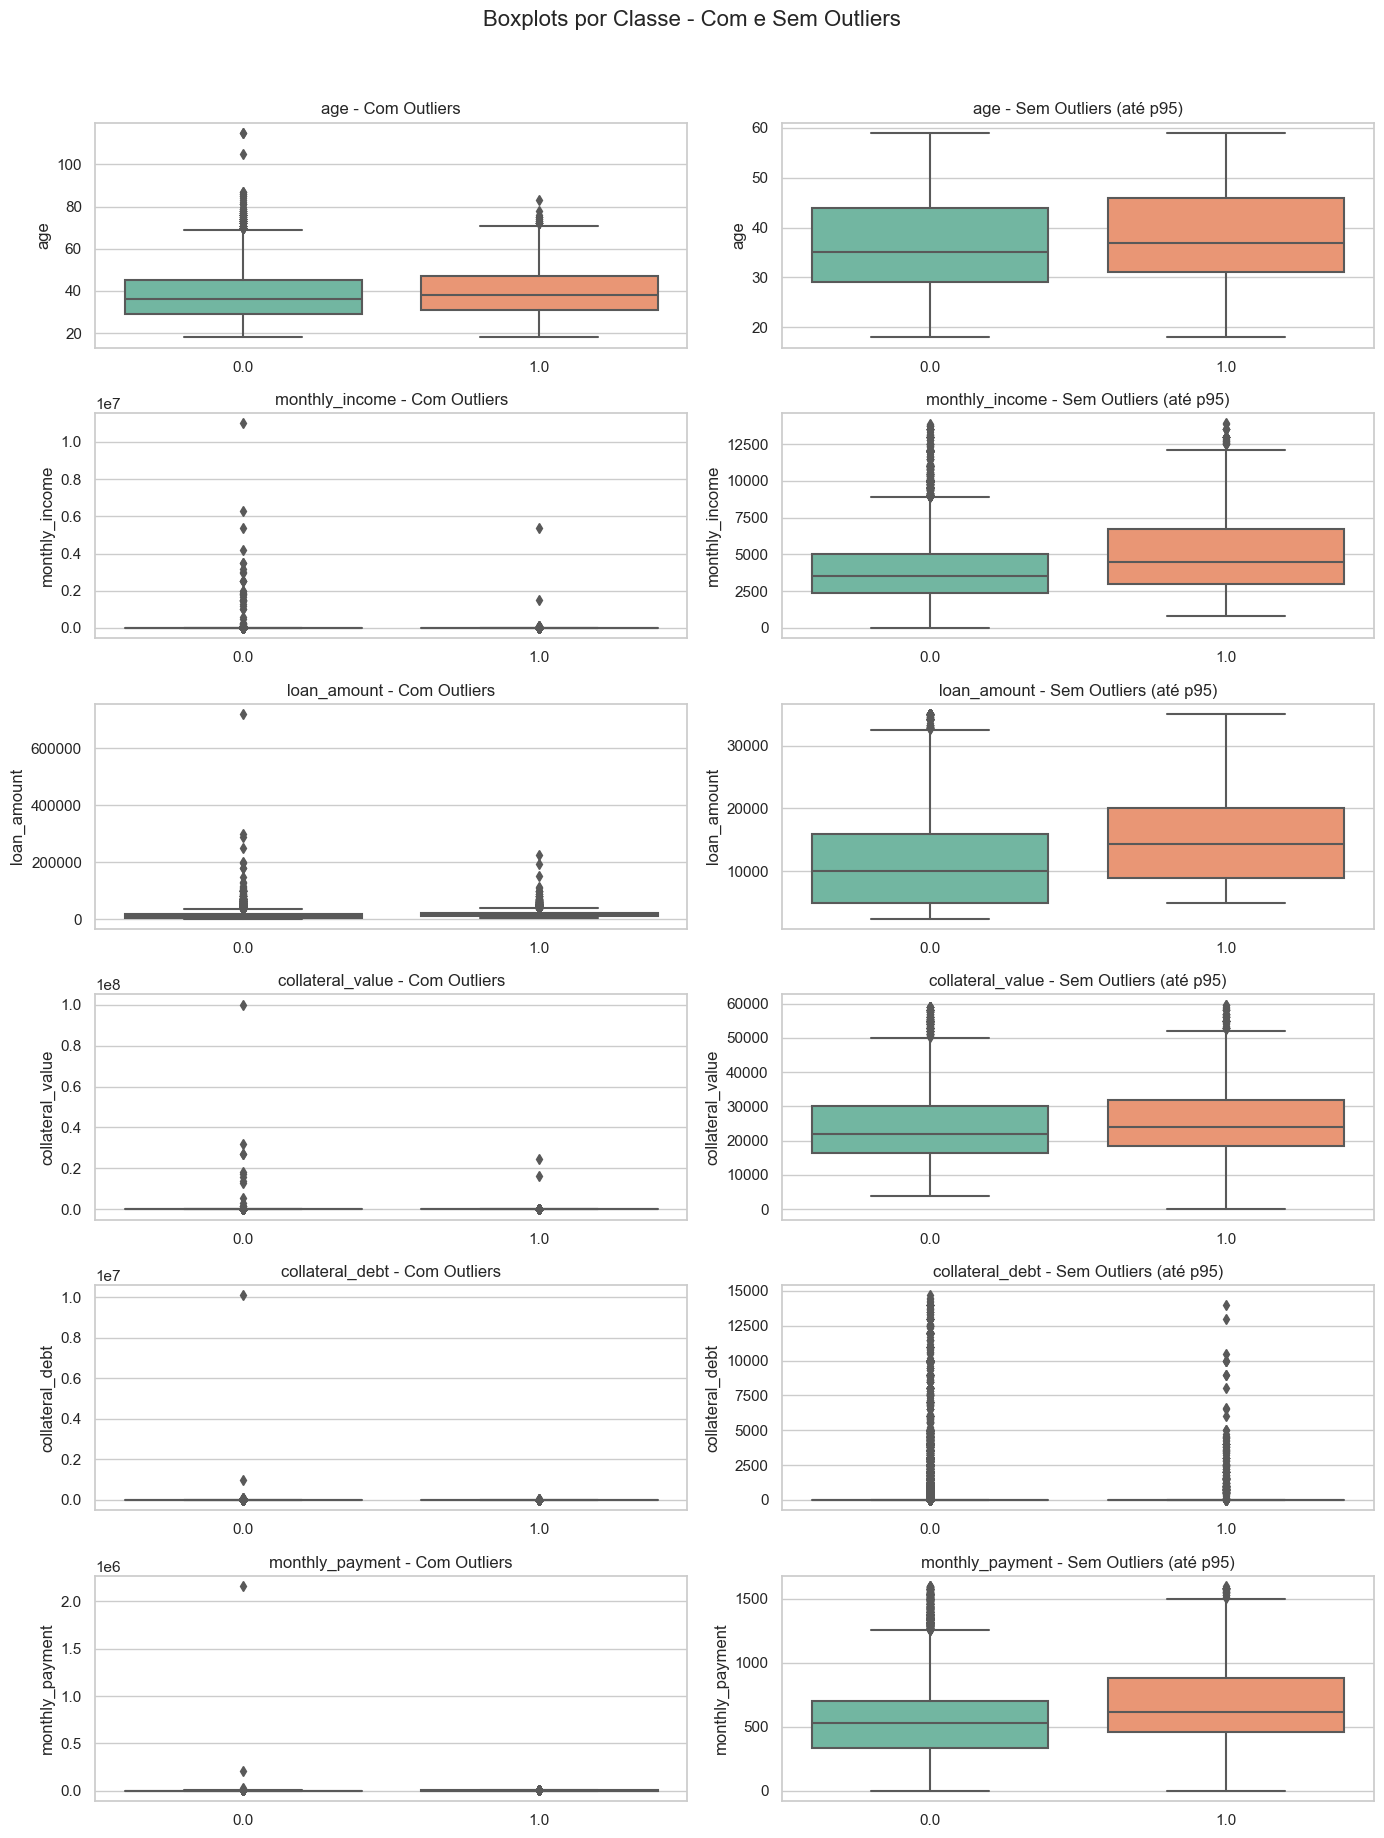

In [66]:

variables = ['age', 'monthly_income', 'loan_amount', 'collateral_value', 'collateral_debt', 'monthly_payment']

fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(14, len(variables)*3))
fig.suptitle("Boxplots por Classe - Com e Sem Outliers", fontsize=16, y=1.02)

for i, col in enumerate(variables):
    # Boxplot completo por classe
    sns.boxplot(data=df_pre_approved, x="sent_to_analysis", y=col, ax=axes[i, 0], palette="Set2")
    axes[i, 0].set_title(f"{col} - Com Outliers")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel(col)

    # Boxplot sem outliers
    limite = df_pre_approved[col].quantile(0.95)
    sns.boxplot(data=df_pre_approved[df_pre_approved[col] < limite], x="sent_to_analysis", y=col,
                ax=axes[i, 1], palette="Set2")
    axes[i, 1].set_title(f"{col} - Sem Outliers (até p95)")
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel(col)

plt.tight_layout()

### Gráficos de barras para flags binárias

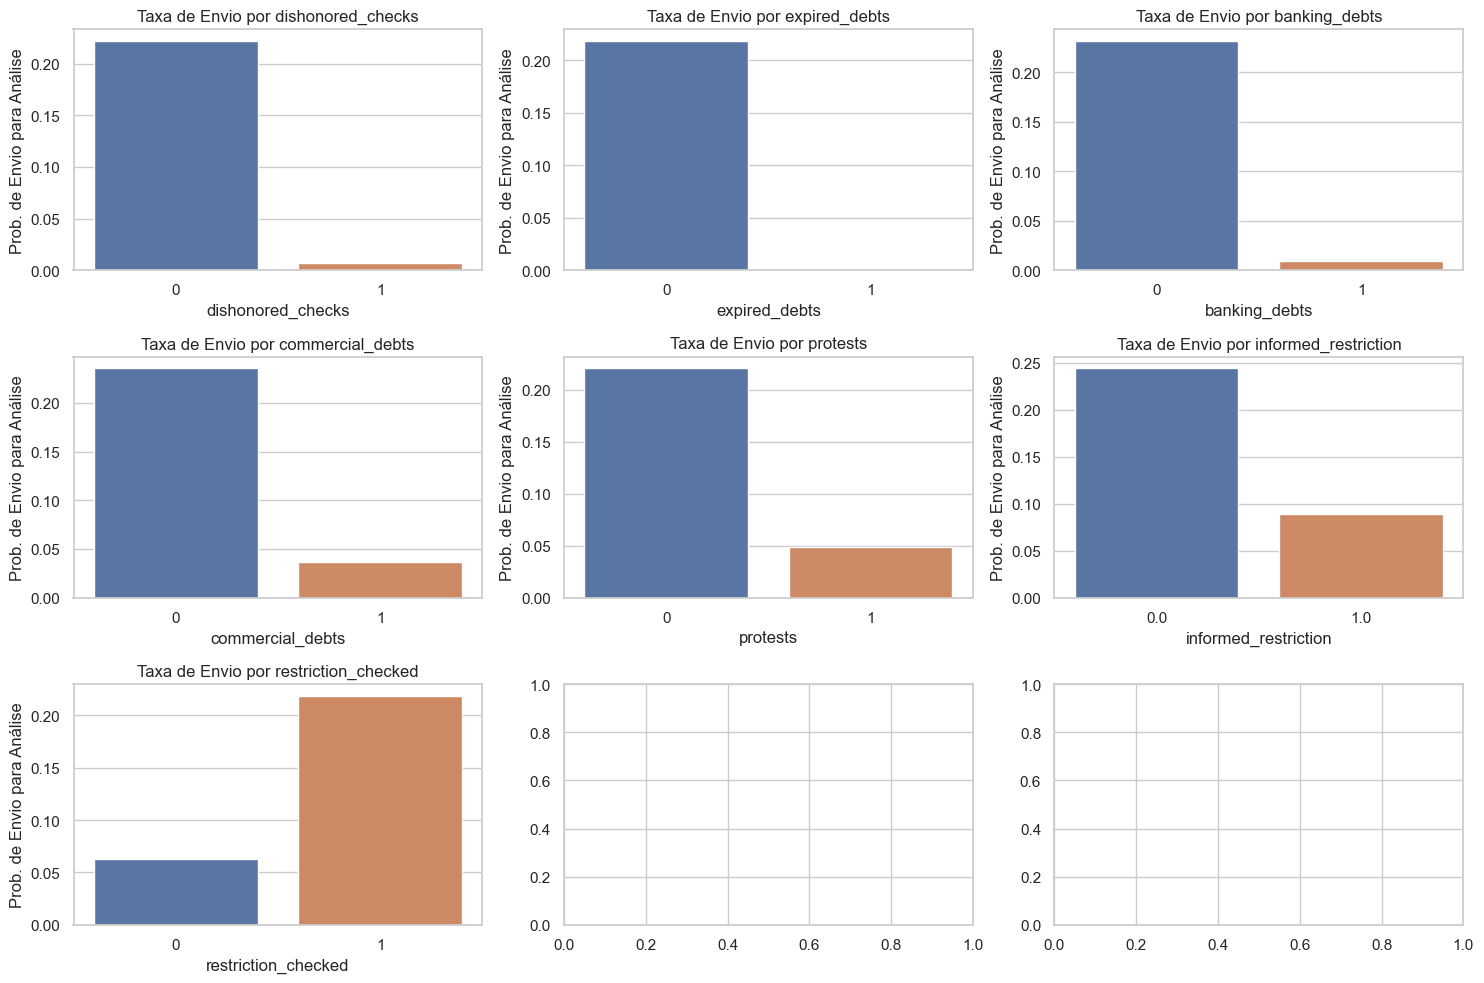

In [43]:
flags = flags_zero + ['restriction_checked']

# Calcular proporção de envio para análise por flag
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, flag in enumerate(flags):
    prop = df_pre_approved.groupby(flag)['sent_to_analysis'].mean()
    sns.barplot(x=prop.index, y=prop.values, ax=axes[i])
    axes[i].set_title(f"Taxa de Envio por {flag}")
    axes[i].set_ylabel("Prob. de Envio para Análise")
    axes[i].set_xlabel(flag)

plt.tight_layout()
plt.show()

Notamos que a probabilidadee de envio para análise é inversamente proporcional ao indicador para alguma restrição.

### Correlograma <i>Pairplot</i> - Relações entre variáveis e decisão de envio

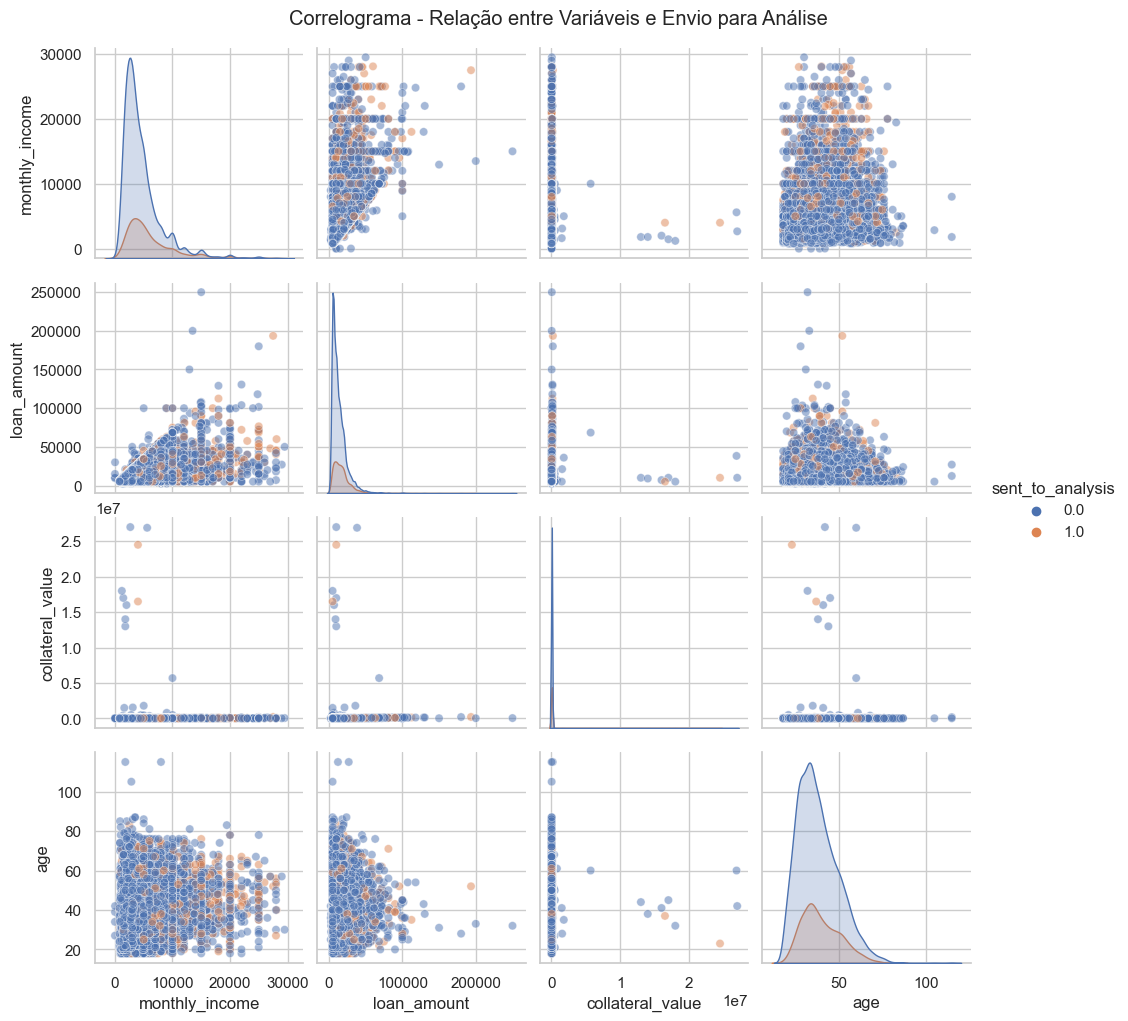

In [45]:
# Selecionar variáveis numéricas mais relevantes
cols_pairplot = ["monthly_income", "loan_amount", "collateral_value", "age", "sent_to_analysis"]

# Filtrar e remover valores extremos, se necessário
df_pair = df_pre_approved[cols_pairplot].copy()
df_pair = df_pair[df_pair["monthly_income"] < 30000]  # exemplo de corte para visualização

# Plotar pairplot colorindo pela classe
sns.pairplot(df_pair, hue="sent_to_analysis", diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("Correlograma - Relação entre Variáveis e Envio para Análise", y=1.02)
plt.show()

### Heatmap de correlação

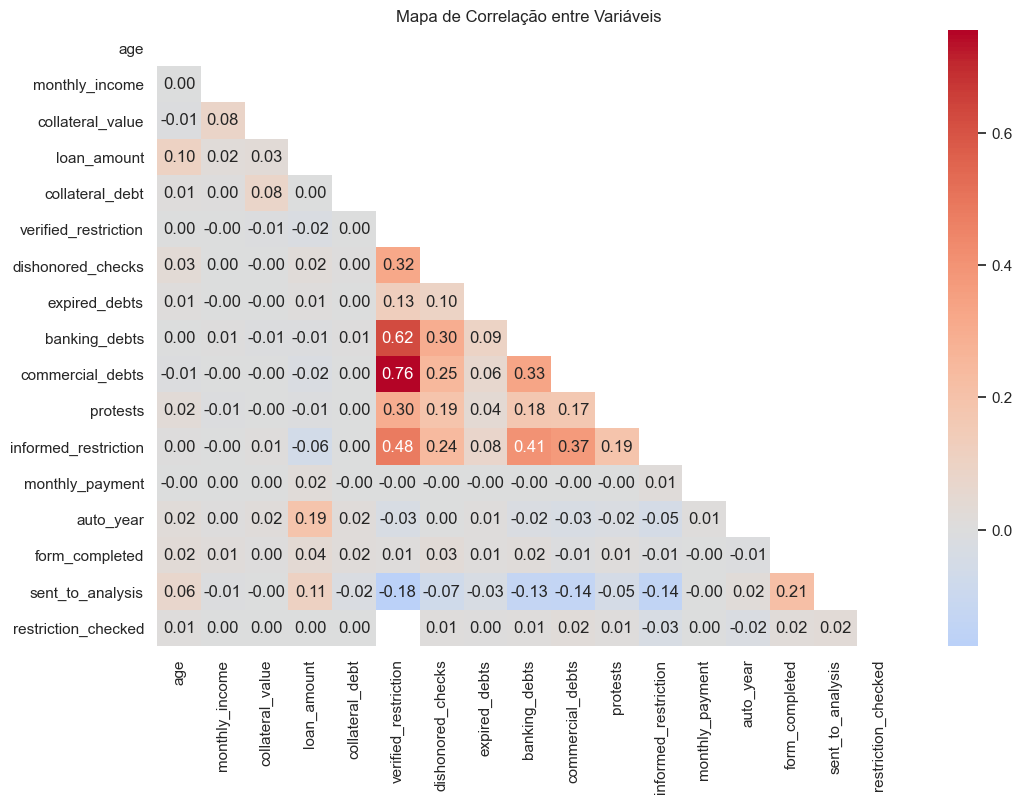

In [46]:
# Matriz de correlação com foco em variáveis numéricas
corr = df_pre_approved.drop(columns='pre_approved').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, mask=mask)
plt.title("Mapa de Correlação entre Variáveis")
plt.show()

> - Nota-se correlação moderada a alta com as flags indicadoras de restrição com a varável target
>
> - Clientes mais velhos tendem a ser enviados para análise com mais frequência
>
> - Renda mensal e valor solicitado de empréstimo parece ter correlação positiva com envio para análise

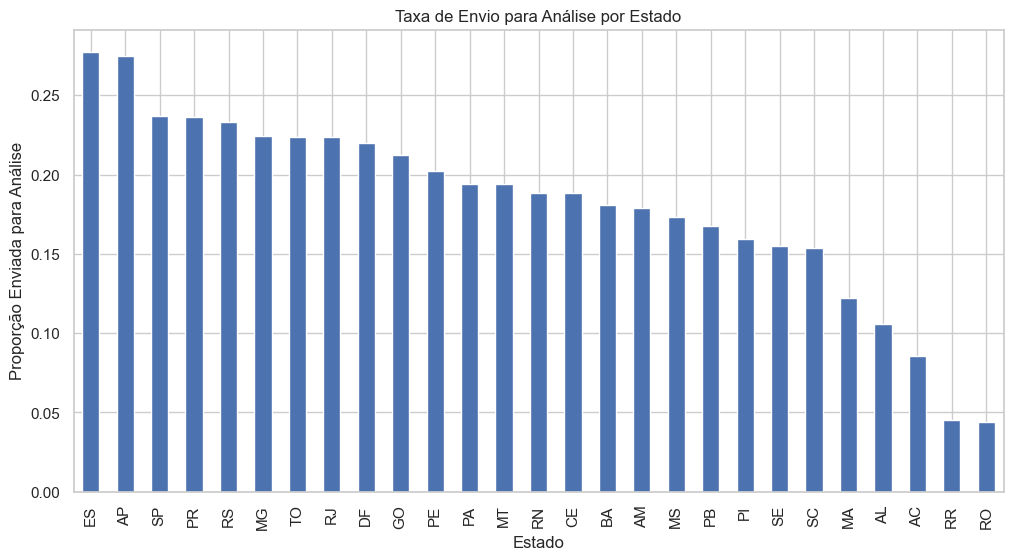

In [47]:
# Proporção de envio para análise por estado
plt.figure(figsize=(12, 6))
state_analysis = df_pre_approved.groupby('state')['sent_to_analysis'].mean().sort_values(ascending=False)
state_analysis.plot(kind='bar')
plt.title('Taxa de Envio para Análise por Estado')
plt.ylabel('Proporção Enviada para Análise')
plt.xlabel('Estado')
plt.show()

### Plotando Variáveis Categóricas

In [48]:
labels = ['city',
 'state',
 'informed_purpose',
 'auto_brand',
 'auto_model',
 'channel',
 'zip_code',
 'landing_page',
 'landing_page_product',
 'gender',
 'education_level']

palletes = ['Spectral_r', 'PuRd', 'Spectral', 'Purples', 'ocean', 'bone_r', 'summer_r', 'Accent', 'Blues', 'BuGn', 'BuPu']

In [71]:
def plotting_cats(df):
    for i in range(len(df.columns)):
        plt.figure(figsize=(5,5))
        df_pre_approved[labels[i]].value_counts(normalize=True).head(10).plot(kind='bar')        
        plt.xlabel(labels[i], fontsize=12)
        plt.title('Distribuição de observações - Histograma variável categórica '+labels[i])
        plt.grid(True, alpha=0.3)
        plt.show()

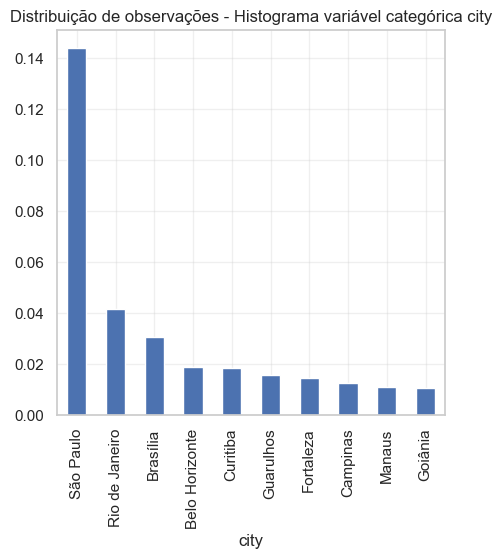

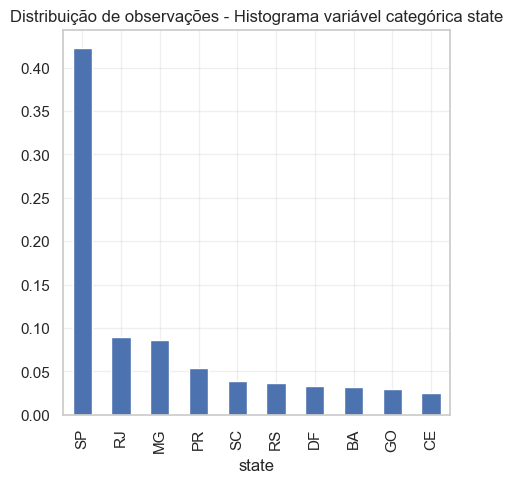

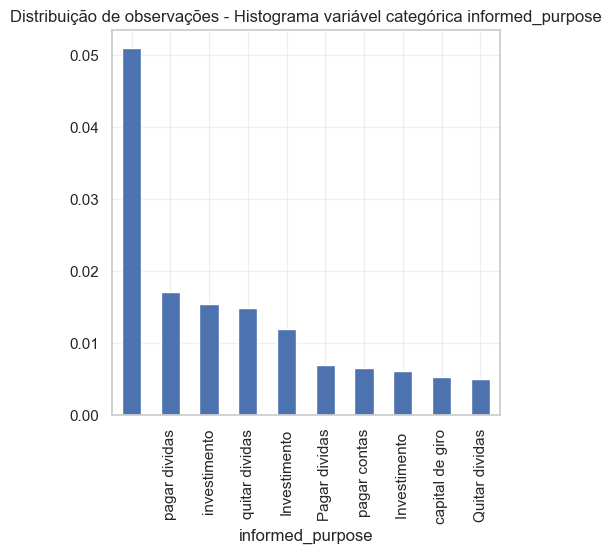

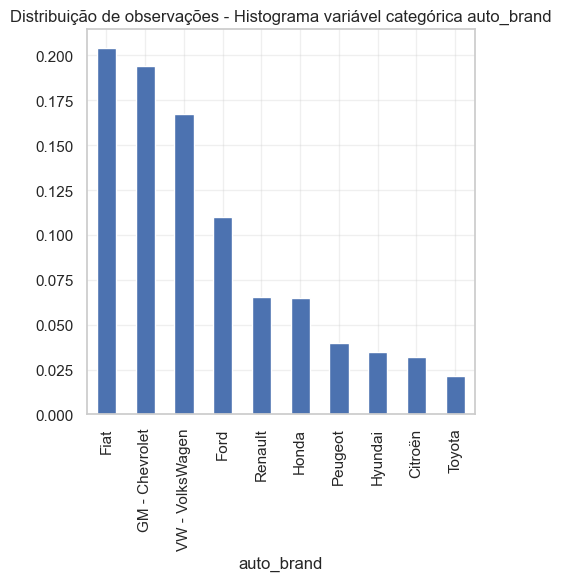

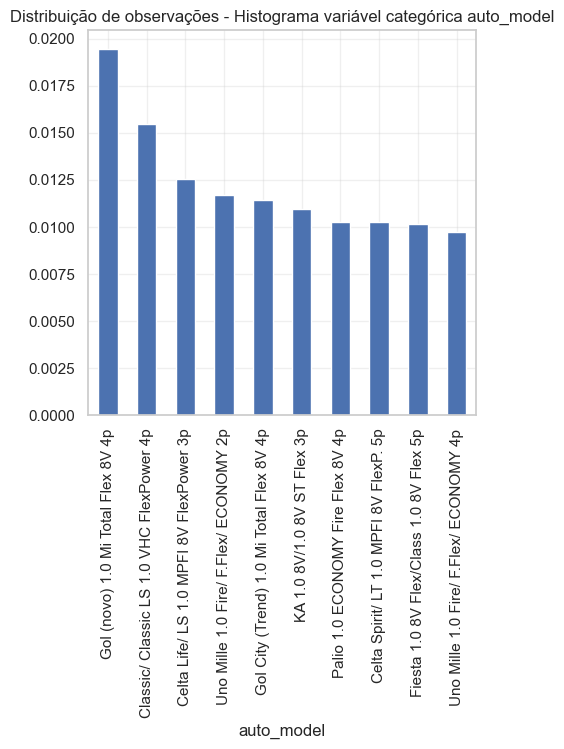

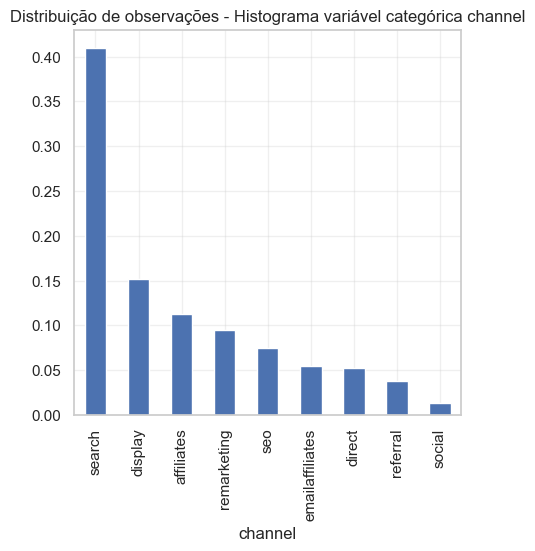

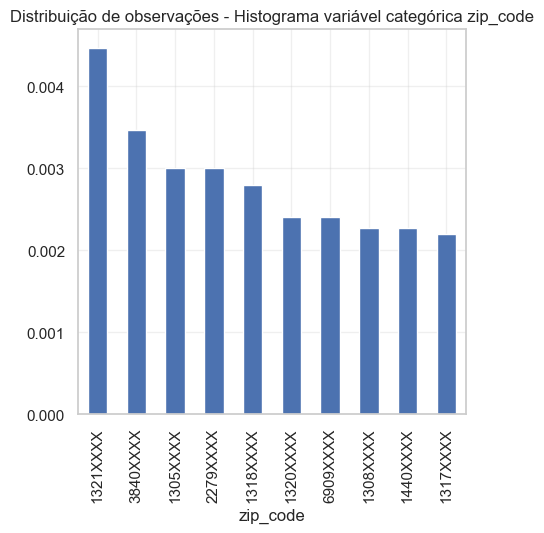

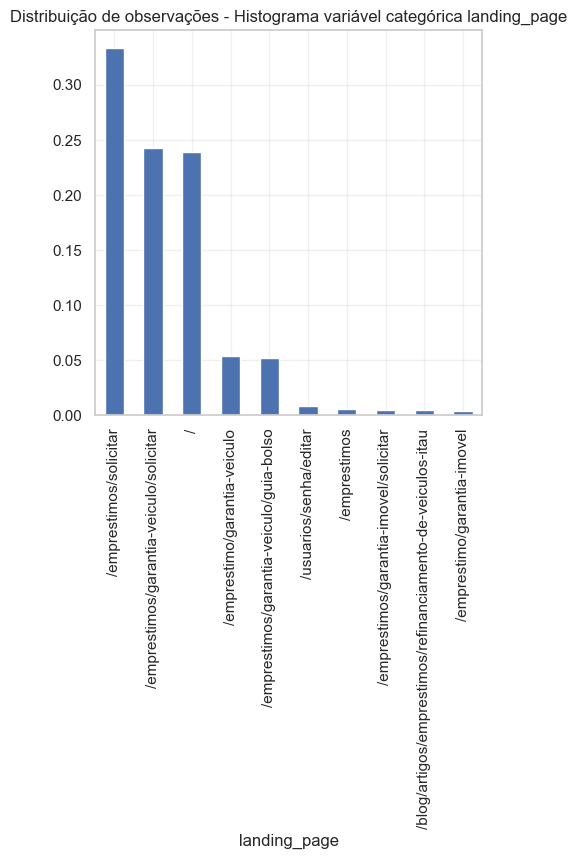

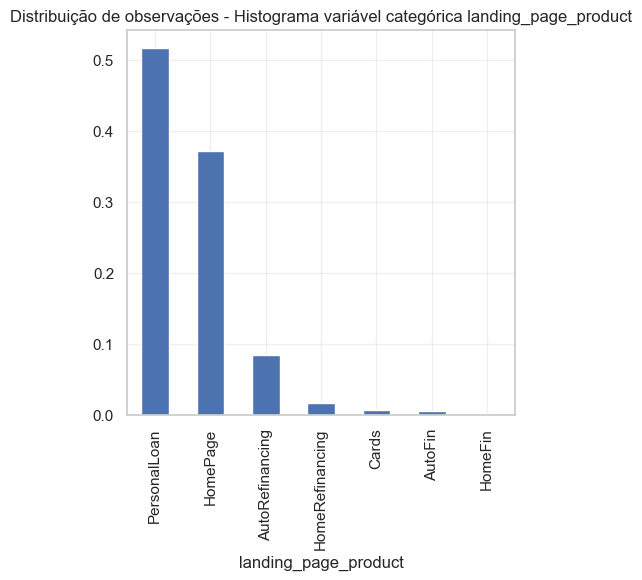

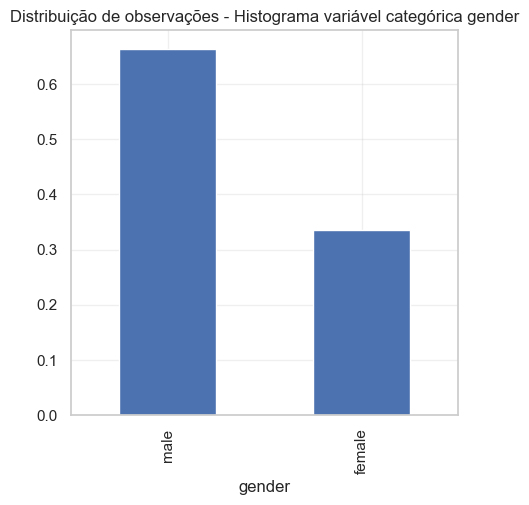

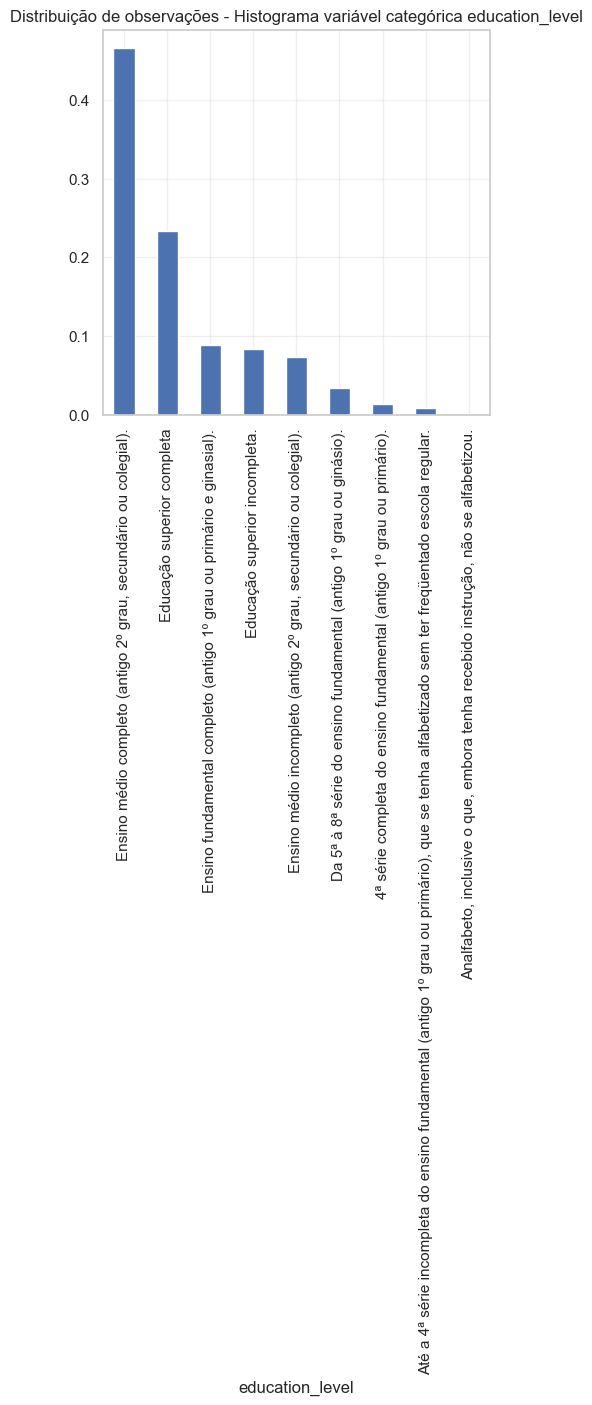

In [72]:
plotting_cats(df_pre_approved[labels])

<a id='MOD_PREP'></a>

<center>

## Preparação para Modelagem

### Normalização (Log Transform) para variáveis assimétricas

In [73]:
# Lista de variáveis com caudas longas (já detectadas)
log_features = ["monthly_income", "collateral_value", "loan_amount", "collateral_debt", "monthly_payment"]

# Aplicar transformação log1p (log(1+x)) — segura para zero
for col in log_features:
    df_pre_approved[f"{col}_log"] = np.log1p(df_pre_approved[col])

### Encoding de variáveis categóricas

In [74]:
#vamos selecionar as variáveis categóricas com baixa cardinalidade
cat_cols_model = ["state", "gender", "channel", "informed_purpose"]

# Preencher valores ausentes com "Desconhecido"
for col in cat_cols_model:
    df_pre_approved[col] = df_pre_approved[col].fillna("Desconhecido")

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df_pre_approved, columns=cat_cols_model, drop_first=True)

### Selecionar apenas as features úteis

In [75]:
# Lista das colunas finais (evita variáveis brutas e duplicadas)
feature_cols = [
    "age"
] + [f"{col}_log" for col in log_features] + flags + list(df_encoded.columns[df_encoded.columns.str.startswith(tuple(cat_cols_model))])

X = df_encoded[feature_cols]
y = df_encoded["sent_to_analysis"]


### Dividir em treino e teste

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

### Balancear as classes com SMOTE

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

<a id='MODELOS'></a>

<center>

## Treinamento dos Modelos e Métricas

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modelo 1: Regressão Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_resampled, y_resampled)
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:,1]

In [78]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [79]:
# Modelo 3: XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

In [80]:
# Modelo 5: SVM
from sklearn.svm import SVC

svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_resampled[:5000], y_resampled[:5000])
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]

### Comparar todos os modelos

In [81]:
# Avaliar todos juntos
modelos = {
    "Logistic Regression": (y_pred_log, y_prob_log),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb, y_prob_xgb),
    "SVM": (y_pred_svm, y_prob_svm)
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

resultados = []

for nome, (y_pred, y_prob) in modelos.items():
    resultados.append({
        "Modelo": nome,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob)
    })

# Criar DataFrame de comparação
import pandas as pd
df_resultados = pd.DataFrame(resultados).sort_values(by="AUC-ROC", ascending=False)
print(df_resultados)

                Modelo  Accuracy  Precision  Recall  F1-Score  AUC-ROC
2              XGBoost      0.74       0.40    0.40      0.40     0.73
1        Random Forest      0.72       0.39    0.51      0.44     0.73
0  Logistic Regression      0.71       0.38    0.51      0.44     0.72
3                  SVM      0.78       0.00    0.00      0.00     0.72


In [82]:
# Função de avaliação
def avaliar_modelo(nome, y_true, y_pred, y_prob):
    print(f"\nModelo: {nome}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_prob))

# Avaliar ambos os modelos
avaliar_modelo("Logistic Regression", y_test, y_pred_log, y_prob_log)
avaliar_modelo("Random Forest", y_test, y_pred_rf, y_prob_rf)
avaliar_modelo("XGBoost", y_test, y_pred_xgb, y_prob_xgb)
avaliar_modelo("SVM", y_test,y_pred_svm, y_prob_svm)



Modelo: Logistic Regression
[[2708  811]
 [ 476  505]]
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81      3519
         1.0       0.38      0.51      0.44       981

    accuracy                           0.71      4500
   macro avg       0.62      0.64      0.62      4500
weighted avg       0.75      0.71      0.73      4500

AUC-ROC: 0.7220453753455467

Modelo: Random Forest
[[2751  768]
 [ 483  498]]
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      3519
         1.0       0.39      0.51      0.44       981

    accuracy                           0.72      4500
   macro avg       0.62      0.64      0.63      4500
weighted avg       0.75      0.72      0.73      4500

AUC-ROC: 0.7339172901207048

Modelo: XGBoost
[[2921  598]
 [ 584  397]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      3519
         1.0       0.40      0.

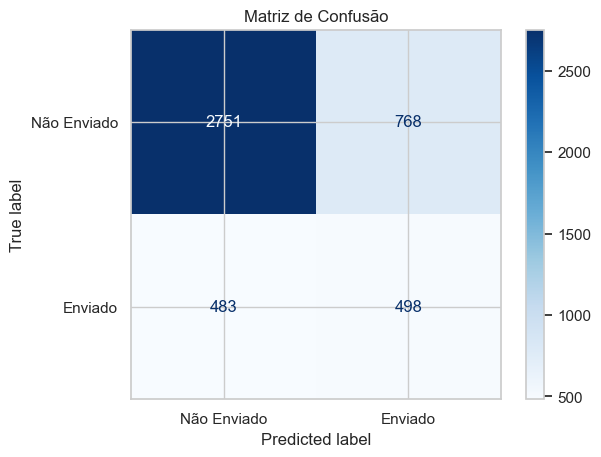

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Enviado", "Enviado"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

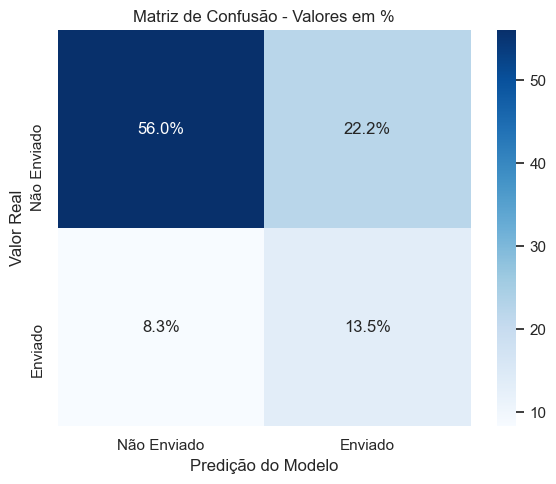

In [113]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_custom)

# Converter para porcentagem
cm_percent = cm / cm.sum() * 100

# Criar labels com o valor em %
labels_cm = np.array([["{:.1f}%".format(v) for v in row] for row in cm_percent])

# Rótulos das classes
labels_x = ["Não Enviado", "Enviado"]
labels_y = ["Não Enviado", "Enviado"]

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=labels_cm, fmt="", cmap="Blues", xticklabels=labels_x, yticklabels=labels_y)
plt.title("Matriz de Confusão - Valores em %")
plt.xlabel("Predição do Modelo")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

> O objetivo do modelo é prever a probabilidade de um cliente (pré-aprovado) ser enviado para análise de crédito.

> - Se o modelo <b>não envia para análise um bom cliente (falso negativo), perdemos oportunidade de fechar negócio.</b>
>
> - Se o modelo <b>envia para análise um cliente ruim (falso positivo), gastamos tempo e esforço com alguém que não vai evoluir.</b>

- Observando os resultados dos modelos testads, vemos que p modelo SVM está completamente desajustado, podendo ser descartado no momento.

- Random Forest e Logistic Regression tiveram melhor <b>recall</b>, ou seja: conseguiram <b>captar mais clientes que realmente foram enviados para análise.</b> (Falsos negativos menores)

- XGBoost teve maior accuracy, mas o recall foi menor - talvez seja mais conservador (não enviar para análise casos que realmente foram - FN)


<b>PROBLEMAS DE NEGÓCIO:</b>
Evitar perder bons clientes ou Evitar gastar tempo com clientes que não serão aprovados?

- O importante é pegar o máximo possível de verdadeiros positivos

- Priorizar recall

- Aceitar que talvez alguns clientes "não tão bons" passem pelo funil

Segundo as métricas o <b>Random Forest e LogReg estão mais equilibrados.</b>
O recall em torno de 50% mostra que o modelo está acertando metade dos clientes bons, mas deixando metade escapar.

#### Estratégias para melhorar o modelo

- Priorize recall, porque o custo de perder um bom cliente parece maior que o de tentar avaliar um que não vai seguir.

- Testar thresholds menores (ex: 0.3 ou 0.4) para ver se consegue aumentar recall sem destruir a precision.

### Curva Precision x Recall

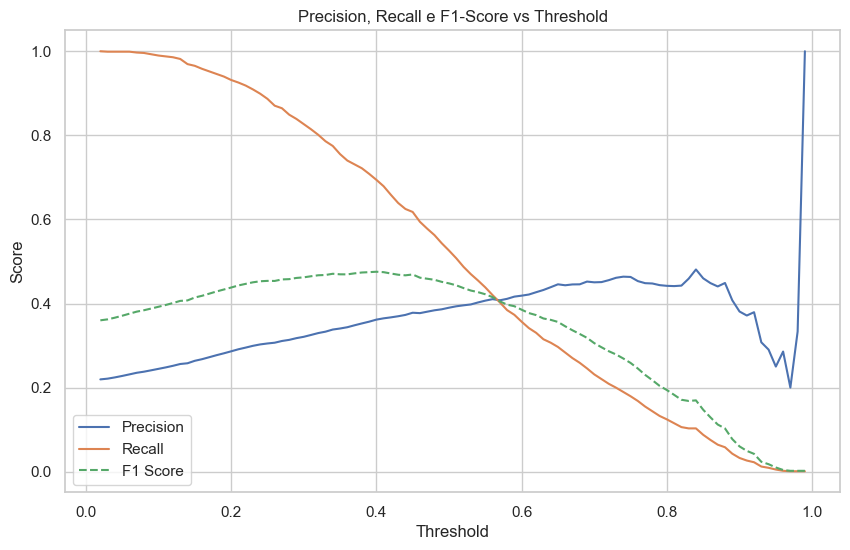

In [83]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Previsões de probabilidade
y_scores = rf.predict_proba(X_test)[:, 1]

# Obter curvas
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Plotar
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', linestyle='--')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall e F1-Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
threshold_custom = 0.35

In [85]:
#Gerar predições binárias com o novo threshold
y_pred_custom = (y_scores >= threshold_custom).astype(int)

# Avaliar
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Avaliação com threshold =", threshold_custom)
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("AUC-ROC:", roc_auc_score(y_test, y_scores))

Avaliação com threshold = 0.35
[[2084 1435]
 [ 240  741]]
              precision    recall  f1-score   support

         0.0       0.90      0.59      0.71      3519
         1.0       0.34      0.76      0.47       981

    accuracy                           0.63      4500
   macro avg       0.62      0.67      0.59      4500
weighted avg       0.78      0.63      0.66      4500

AUC-ROC: 0.7339172901207048


In [86]:
#Testando vário thresholds
for t in [0.3, 0.35, 0.4, 0.45, 0.5]:
    print(f"\n--- Threshold: {t} ---")
    y_pred = (y_scores >= t).astype(int)
    print(classification_report(y_test, y_pred, digits=3))


--- Threshold: 0.3 ---
              precision    recall  f1-score   support

         0.0      0.914     0.512     0.656      3519
         1.0      0.321     0.827     0.462       981

    accuracy                          0.581      4500
   macro avg      0.617     0.669     0.559      4500
weighted avg      0.785     0.581     0.614      4500


--- Threshold: 0.35 ---
              precision    recall  f1-score   support

         0.0      0.897     0.592     0.713      3519
         1.0      0.341     0.755     0.469       981

    accuracy                          0.628      4500
   macro avg      0.619     0.674     0.591      4500
weighted avg      0.775     0.628     0.660      4500


--- Threshold: 0.4 ---
              precision    recall  f1-score   support

         0.0      0.885     0.658     0.755      3519
         1.0      0.362     0.694     0.476       981

    accuracy                          0.666      4500
   macro avg      0.624     0.676     0.615      4500
w

#### Importância das Variáveis (Random Forest)

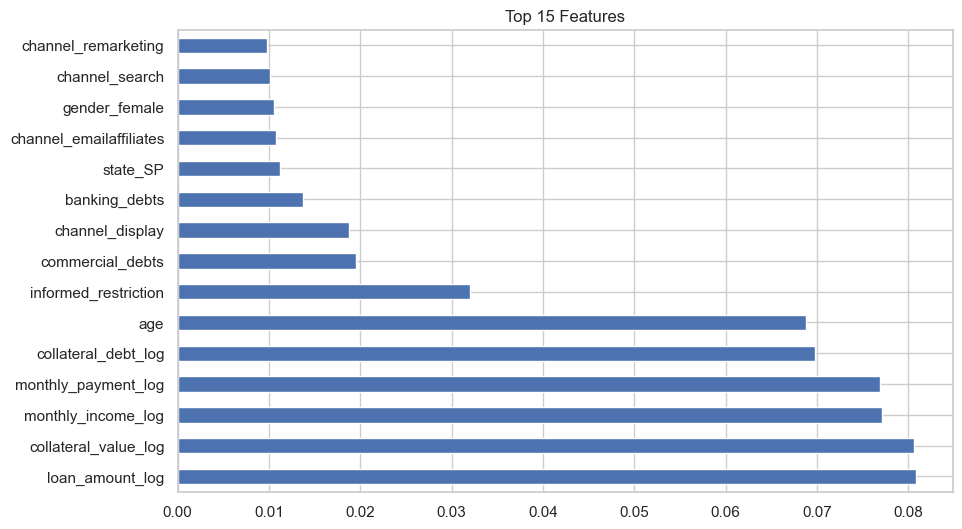

In [88]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh', figsize=(10, 6), title="Top 15 Features")
plt.show()

### Gráficos visuais das métricas

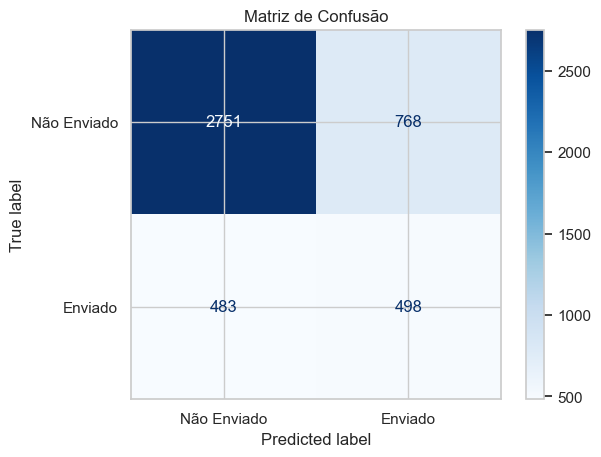

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)  # ou outro modelo
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Enviado", "Enviado"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

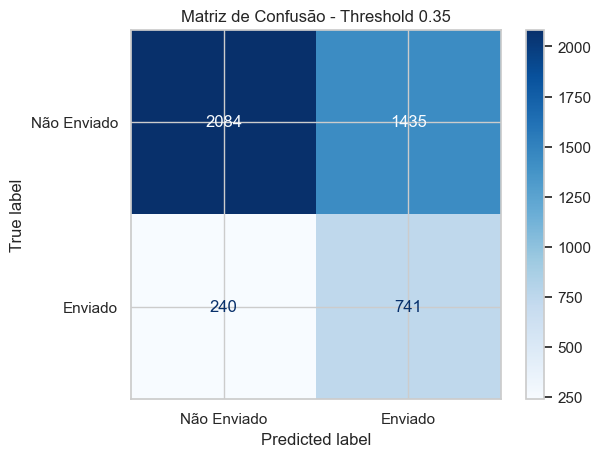

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_scores = rf.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred_custom = (y_scores >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Enviado", "Enviado"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Threshold 0.35")
plt.show()

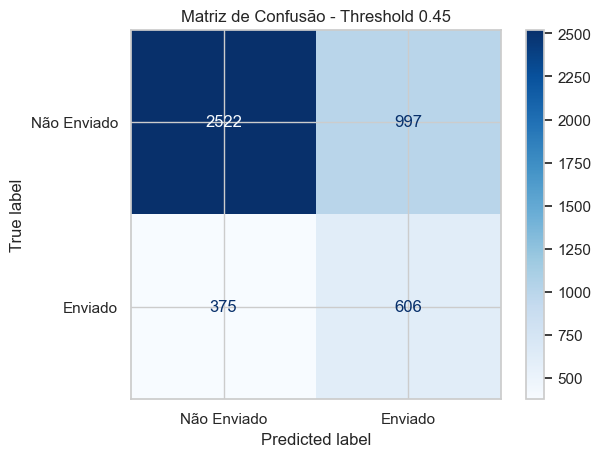

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_scores = rf.predict_proba(X_test)[:, 1]
threshold = 0.45
y_pred_custom = (y_scores >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Enviado", "Enviado"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Threshold "+str(threshold))
plt.show()

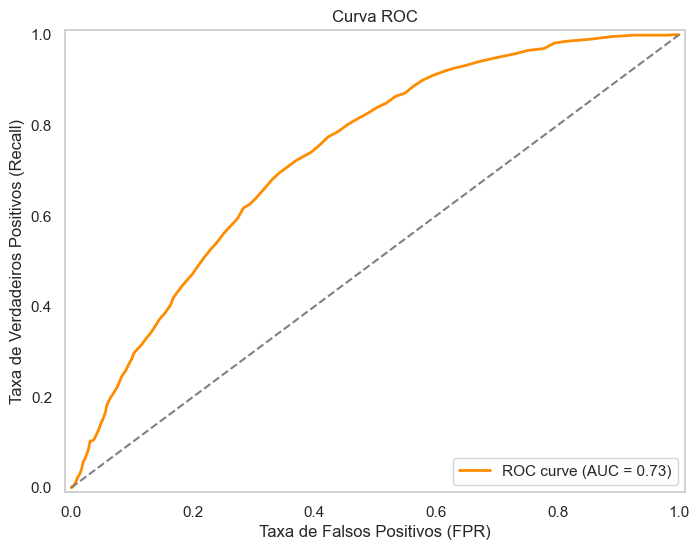

In [92]:
from sklearn.metrics import roc_curve, auc

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Avaliando Features usando a ferramenta SHAP

In [93]:
# import shap

# top_features = importances.sort_values(ascending=False).head(40).index
# X_small = X_test[top_features].astype("float32")[:100]

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_small)

In [94]:
# shap.summary_plot(shap_values[1], X_small, plot_type="bar")

In [95]:
# shap.summary_plot(shap_values[1], X_small)  # Classe 1

In [96]:
# shap.plots._waterfall.waterfall_legacy(
#     explainer.expected_value[1], shap_values[1][10], X_small.iloc[10]
# )

In [97]:
# # Gráfico de barras das variáveis mais impactantes
# shap.plots.bar(shap_values, max_display=15)

In [98]:
# # Gráfico de dispersão por variável (colorido pela feature)
# shap.plots.beeswarm(shap_values, max_display=15)

In [99]:
# # Explicar uma previsão específica (ex: cliente da linha 10 do X_test)
# shap.plots.waterfall(shap_values[10])

<a id='RANK'></a>

## Gerar Ranking de Clientes por Probabilidade

In [117]:
# Criar ranking no conjunto de teste
ranking_df = X_test.copy()
ranking_df["prob_sent_to_analysis"] = y_prob_rf
ranking_df["real_class"] = y_test.values

# Ordenar pelo score de maior para menor
ranking_df = ranking_df.sort_values(by="prob_sent_to_analysis", ascending=False)

# Visualizar top clientes
ranking_df.head(10)

,age,monthly_income_log,collateral_value_log,loan_amount_log,collateral_debt_log,monthly_payment_log,dishonored_checks,expired_debts,banking_debts,commercial_debts,...,informed_purpose_zerar algumas contas,informed_purpose_zerar cheque especial usado para cobrir despesas com velória de avó,informed_purpose_zerar despesas extras,informed_purpose_zerar limite bancário e pagar o ipva e multa,informed_purpose_zerar pagamento de contas,informed_purpose_~diversos,informed_purpose_É pra compra material para o lanche para eu vender,informed_purpose_óbito na familia,prob_sent_to_analysis,real_class
13657,45.00,9.11,10.09,9.85,0.00,6.68,0,0,0,0,...,0,0,0,0,0,0,0,0,0.99,1.00
31570,50.00,8.37,9.95,9.85,0.00,6.72,0,0,0,0,...,0,0,0,0,0,0,0,0,0.98,0.00
21150,37.00,8.92,9.80,9.70,0.00,6.32,0,0,0,0,...,0,0,0,0,0,0,0,0,0.98,0.00
16046,44.00,8.64,10.50,10.39,0.00,7.22,0,0,0,0,...,0,0,0,0,0,0,0,0,0.97,0.00
24189,31.00,8.37,9.93,8.99,0.00,6.31,0,0,0,0,...,0,0,0,0,0,0,0,0,0.97,0.00
15111,43.00,9.21,10.31,10.20,0.00,6.77,0,0,0,0,...,0,0,0,0,0,0,0,0,0.96,0.00
27583,31.00,8.73,10.04,9.94,0.00,6.90,0,0,0,0,...,0,0,0,0,0,0,0,0,0.96,1.00
6681,37.00,8.78,9.90,9.80,0.00,6.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0.95,0.00
13313,49.00,9.16,10.37,9.80,0.00,6.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0.95,0.00
28478,33.00,8.85,10.13,9.55,0.00,6.69,0,0,0,0,...,0,0,0,0,0,0,0,0,0.95,0.00


<a href='#Inicio'>Voltar para o início</a>